In [ ]:
!pip -qq install pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 11.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import dateutil
import numpy as np
import pymongo
from pymongo import MongoClient
import json
from urllib.parse import quote_plus
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [ ]:
!pip3 -q install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Biplab_ET_Assignment').getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from pyspark.sql.functions import mean
from pyspark.ml.feature import (VectorAssembler,OneHotEncoder, StringIndexer)
from pyspark.ml import Pipeline
from pyspark.ml import PipelineModel
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=Biplab_ET_Assignment>

In [ ]:
!wget -O dataset.csv -q  https://raw.githubusercontent.com/Data-Science-Revolution/Credit-Card-Approval/main/clean_dataset.csv

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Data-Science-Revolution/Credit-Card-Approval/main/clean_dataset.csv")

In [ ]:
data=df.to_dict(orient="records")
data

[{'Gender': 1,
  'Age': 30.83,
  'Debt': 0.0,
  'Married': 1,
  'BankCustomer': 1,
  'Industry': 'Industrials',
  'Ethnicity': 'White',
  'YearsEmployed': 1.25,
  'PriorDefault': 1,
  'Employed': 1,
  'CreditScore': 1,
  'DriversLicense': 0,
  'Citizen': 'ByBirth',
  'ZipCode': 202,
  'Income': 0,
  'Approved': 1},
 {'Gender': 0,
  'Age': 58.67,
  'Debt': 4.46,
  'Married': 1,
  'BankCustomer': 1,
  'Industry': 'Materials',
  'Ethnicity': 'Black',
  'YearsEmployed': 3.04,
  'PriorDefault': 1,
  'Employed': 1,
  'CreditScore': 6,
  'DriversLicense': 0,
  'Citizen': 'ByBirth',
  'ZipCode': 43,
  'Income': 560,
  'Approved': 1},
 {'Gender': 0,
  'Age': 24.5,
  'Debt': 0.5,
  'Married': 1,
  'BankCustomer': 1,
  'Industry': 'Materials',
  'Ethnicity': 'Black',
  'YearsEmployed': 1.5,
  'PriorDefault': 1,
  'Employed': 0,
  'CreditScore': 0,
  'DriversLicense': 0,
  'Citizen': 'ByBirth',
  'ZipCode': 280,
  'Income': 824,
  'Approved': 1},
 {'Gender': 1,
  'Age': 27.83,
  'Debt': 1.54,
  'M

In [ ]:
!curl -fsSL https://pgp.mongodb.com/server-6.0.asc | \
   sudo gpg -o /usr/share/keyrings/mongodb-server-6.0.gpg \
   --dearmor
# ------------
!echo "deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-6.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-6.0.list
# ------------
!sudo apt-get update > /dev/null
# --------------------
!sudo apt-get install -y mongodb-org > /dev/null
# -----
!sudo mkdir -p /var/log/mongodb /var/lib/mongodb
# ---------
!sudo chown `whoami` /var/lib/mongodb /var/log/mongodb/

deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-6.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 9.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [ ]:
!nohup mongod --config /etc/mongod.conf &

nohup: appending output to 'nohup.out'


In [ ]:
url = "mongodb://localhost:27017"
client = MongoClient(url)
client.list_database_names()

['admin', 'config', 'local']

In [ ]:
db = client["BDNS"]

In [ ]:
client.list_database_names()

['admin', 'config', 'local']

In [ ]:
table = db.BDNS
table.count_documents({})

0

In [ ]:
db.BDNS.insert_many(data)

InsertManyResult([ObjectId('659a9bf67e97483ae268a2db'), ObjectId('659a9bf67e97483ae268a2dc'), ObjectId('659a9bf67e97483ae268a2dd'), ObjectId('659a9bf67e97483ae268a2de'), ObjectId('659a9bf67e97483ae268a2df'), ObjectId('659a9bf67e97483ae268a2e0'), ObjectId('659a9bf67e97483ae268a2e1'), ObjectId('659a9bf67e97483ae268a2e2'), ObjectId('659a9bf67e97483ae268a2e3'), ObjectId('659a9bf67e97483ae268a2e4'), ObjectId('659a9bf67e97483ae268a2e5'), ObjectId('659a9bf67e97483ae268a2e6'), ObjectId('659a9bf67e97483ae268a2e7'), ObjectId('659a9bf67e97483ae268a2e8'), ObjectId('659a9bf67e97483ae268a2e9'), ObjectId('659a9bf67e97483ae268a2ea'), ObjectId('659a9bf67e97483ae268a2eb'), ObjectId('659a9bf67e97483ae268a2ec'), ObjectId('659a9bf67e97483ae268a2ed'), ObjectId('659a9bf67e97483ae268a2ee'), ObjectId('659a9bf67e97483ae268a2ef'), ObjectId('659a9bf67e97483ae268a2f0'), ObjectId('659a9bf67e97483ae268a2f1'), ObjectId('659a9bf67e97483ae268a2f2'), ObjectId('659a9bf67e97483ae268a2f3'), ObjectId('659a9bf67e97483ae268a2

In [ ]:

db.list_collection_names()

['BDNS']

In [ ]:
ab=db.BDNS

In [ ]:
cd=db.BDNS.find()

In [ ]:
list_cursor=list(cd)

In [ ]:
print(list_cursor)

[{'_id': ObjectId('659a9bf67e97483ae268a2db'), 'Gender': 1, 'Age': 30.83, 'Debt': 0.0, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Industrials', 'Ethnicity': 'White', 'YearsEmployed': 1.25, 'PriorDefault': 1, 'Employed': 1, 'CreditScore': 1, 'DriversLicense': 0, 'Citizen': 'ByBirth', 'ZipCode': 202, 'Income': 0, 'Approved': 1}, {'_id': ObjectId('659a9bf67e97483ae268a2dc'), 'Gender': 0, 'Age': 58.67, 'Debt': 4.46, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Materials', 'Ethnicity': 'Black', 'YearsEmployed': 3.04, 'PriorDefault': 1, 'Employed': 1, 'CreditScore': 6, 'DriversLicense': 0, 'Citizen': 'ByBirth', 'ZipCode': 43, 'Income': 560, 'Approved': 1}, {'_id': ObjectId('659a9bf67e97483ae268a2dd'), 'Gender': 0, 'Age': 24.5, 'Debt': 0.5, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Materials', 'Ethnicity': 'Black', 'YearsEmployed': 1.5, 'PriorDefault': 1, 'Employed': 0, 'CreditScore': 0, 'DriversLicense': 0, 'Citizen': 'ByBirth', 'ZipCode': 280, 'Income': 824, 'Approved': 1}, {'_id': 

In [ ]:
s_data=pd.DataFrame(list_cursor)

In [ ]:
s_data.head()

_id  Gender    Age   Debt  Married  BankCustomer  \
0  659a9bf67e97483ae268a2db       1  30.83  0.000        1             1   
1  659a9bf67e97483ae268a2dc       0  58.67  4.460        1             1   
2  659a9bf67e97483ae268a2dd       0  24.50  0.500        1             1   
3  659a9bf67e97483ae268a2de       1  27.83  1.540        1             1   
4  659a9bf67e97483ae268a2df       1  20.17  5.625        1             1   

      Industry Ethnicity  YearsEmployed  PriorDefault  Employed  CreditScore  \
0  Industrials     White           1.25             1         1            1   
1    Materials     Black           3.04             1         1            6   
2    Materials     Black           1.50             1         0            0   
3  Industrials     White           3.75             1         1            5   
4  Industrials     White           1.71             1         0            0   

   DriversLicense       Citizen  ZipCode  Income  Approved  
0               0       ByBirth      202       0         1  
1               0       ByBirth       43     560         1  
2               0       ByBirth      280     824         1  
3               1       ByBirth      100       3         1  
4               0  ByOtherMeans      120       0         1

In [ ]:
!pip3 -q install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Biplab_ET_Assignment').getOrCreate()

In [ ]:
import seaborn as sns
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler,StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.linalg import DenseVector
from pyspark.ml.regression import LinearRegression,DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
!wget -O Data_Set.csv -q https://raw.githubusercontent.com/Data-Science-Revolution/Credit-Card-Approval/main/clean_dataset.csv


In [ ]:
schema='{"fields":[{"metadata":{},"name":"selling_price","nullable":true,"type":"long"},{"metadata":{},"name":"km_driven","nullable":true,"type":"long"},{"metadata":{},"name":"year_of_service","nullable":true,"type":"long"},{"metadata":{"ml_attr":{"name":"fuel_indexer","type":"nominal","vals":["Diesel","Petrol","CNG","LPG"]}},"name":"fuel_indexer","nullable":false,"type":"double"},{"metadata":{"ml_attr":{"attrs":{"binary":[{"idx":0,"name":"Diesel"},{"idx":1,"name":"Petrol"},{"idx":2,"name":"CNG"}]},"num_attrs":3}},"name":"fuel_Vector","nullable":true,"type":{"class":"org.apache.spark.ml.linalg.VectorUDT","pyClass":"pyspark.ml.linalg.VectorUDT","sqlType":{"fields":[{"metadata":{},"name":"type","nullable":false,"type":"byte"},{"metadata":{},"name":"size","nullable":true,"type":"integer"},{"metadata":{},"name":"indices","nullable":true,"type":{"containsNull":false,"elementType":"integer","type":"array"}},{"metadata":{},"name":"values","nullable":true,"type":{"containsNull":false,"elementType":"double","type":"array"}}],"type":"struct"},"type":"udt"}},{"metadata":{"ml_attr":{"name":"seller_type_indexer","type":"nominal","vals":["Individual","Dealer","Trustmark Dealer"]}},"name":"seller_type_indexer","nullable":false,"type":"double"},{"metadata":{"ml_attr":{"attrs":{"binary":[{"idx":0,"name":"Individual"},{"idx":1,"name":"Dealer"}]},"num_attrs":2}},"name":"seller_type_vector","nullable":true,"type":{"class":"org.apache.spark.ml.linalg.VectorUDT","pyClass":"pyspark.ml.linalg.VectorUDT","sqlType":{"fields":[{"metadata":{},"name":"type","nullable":false,"type":"byte"},{"metadata":{},"name":"size","nullable":true,"type":"integer"},{"metadata":{},"name":"indices","nullable":true,"type":{"containsNull":false,"elementType":"integer","type":"array"}},{"metadata":{},"name":"values","nullable":true,"type":{"containsNull":false,"elementType":"double","type":"array"}}],"type":"struct"},"type":"udt"}},{"metadata":{"ml_attr":{"name":"owner_indexer","type":"nominal","vals":["First Owner","Second Owner","Third Owner","Fourth & Above Owner","Test Drive Car"]}},"name":"owner_indexer","nullable":false,"type":"double"},{"metadata":{"ml_attr":{"attrs":{"binary":[{"idx":0,"name":"First Owner"},{"idx":1,"name":"Second Owner"},{"idx":2,"name":"Third Owner"},{"idx":3,"name":"Fourth & Above Owner"}]},"num_attrs":4}},"name":"owner_vector","nullable":true,"type":{"class":"org.apache.spark.ml.linalg.VectorUDT","pyClass":"pyspark.ml.linalg.VectorUDT","sqlType":{"fields":[{"metadata":{},"name":"type","nullable":false,"type":"byte"},{"metadata":{},"name":"size","nullable":true,"type":"integer"},{"metadata":{},"name":"indices","nullable":true,"type":{"containsNull":false,"elementType":"integer","type":"array"}},{"metadata":{},"name":"values","nullable":true,"type":{"containsNull":false,"elementType":"double","type":"array"}}],"type":"struct"},"type":"udt"}},{"metadata":{"ml_attr":{"name":"transmission_indexer","type":"nominal","vals":["Manual","Automatic"]}},"name":"transmission_indexer","nullable":false,"type":"double"},{"metadata":{"ml_attr":{"attrs":{"binary":[{"idx":0,"name":"Manual"}]},"num_attrs":1}},"name":"transmission_vector","nullable":true,"type":{"class":"org.apache.spark.ml.linalg.VectorUDT","pyClass":"pyspark.ml.linalg.VectorUDT","sqlType":{"fields":[{"metadata":{},"name":"type","nullable":false,"type":"byte"},{"metadata":{},"name":"size","nullable":true,"type":"integer"},{"metadata":{},"name":"indices","nullable":true,"type":{"containsNull":false,"elementType":"integer","type":"array"}},{"metadata":{},"name":"values","nullable":true,"type":{"containsNull":false,"elementType":"double","type":"array"}}],"type":"struct"},"type":"udt"}},{"metadata":{"ml_attr":{"attrs":{"binary":[{"idx":2,"name":"fuel_Vector_Diesel"},{"idx":3,"name":"fuel_Vector_Petrol"},{"idx":4,"name":"fuel_Vector_CNG"},{"idx":5,"name":"seller_type_vector_Individual"},{"idx":6,"name":"seller_type_vector_Dealer"},{"idx":7,"name":"owner_vector_First Owner"},{"idx":8,"name":"owner_vector_Second Owner"},{"idx":9,"name":"owner_vector_Third Owner"},{"idx":10,"name":"owner_vector_Fourth & Above Owner"},{"idx":11,"name":"transmission_vector_Manual"}],"numeric":[{"idx":0,"name":"km_driven"},{"idx":1,"name":"year_of_service"}]},"num_attrs":12}},"name":"features","nullable":true,"type":{"class":"org.apache.spark.ml.linalg.VectorUDT","pyClass":"pyspark.ml.linalg.VectorUDT","sqlType":{"fields":[{"metadata":{},"name":"type","nullable":false,"type":"byte"},{"metadata":{},"name":"size","nullable":true,"type":"integer"},{"metadata":{},"name":"indices","nullable":true,"type":{"containsNull":false,"elementType":"integer","type":"array"}},{"metadata":{},"name":"values","nullable":true,"type":{"containsNull":false,"elementType":"double","type":"array"}}],"type":"struct"},"type":"udt"}}],"type":"struct"}'

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .config("spark.mongodb.input.uri", "mongodb://localhost:27017/sparkDB.coll01") \
    .config("spark.mongodb.output.uri", "mongodb://localhost:27017/sparkDB.coll01") \
    .config('spark.jars.packages', 'org.mongodb.spark:mongo-spark-connector_2.12:3.0.1')\
    .getOrCreate()

In [ ]:
# Load and Read the dataset
dfCusCon=spark.read.csv('Data_Set.csv',inferSchema=True,header=True)
# Chech the datatypes of the inputs
dfCusCon.printSchema()


root
 |-- Gender: integer (nullable = true)
 |-- Age: double (nullable = true)
 |-- Debt: double (nullable = true)
 |-- Married: integer (nullable = true)
 |-- BankCustomer: integer (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Ethnicity: string (nullable = true)
 |-- YearsEmployed: double (nullable = true)
 |-- PriorDefault: integer (nullable = true)
 |-- Employed: integer (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- DriversLicense: integer (nullable = true)
 |-- Citizen: string (nullable = true)
 |-- ZipCode: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Approved: integer (nullable = true)



In [ ]:
# Check the shape of the dataset
print((dfCusCon.count(), len(dfCusCon.columns)))

(690, 16)


In [ ]:
# Look at the dataset using SPARK
dfCusCon.show(5)

+------+-----+-----+-------+------------+-----------+---------+-------------+------------+--------+-----------+--------------+------------+-------+------+--------+
|Gender|  Age| Debt|Married|BankCustomer|   Industry|Ethnicity|YearsEmployed|PriorDefault|Employed|CreditScore|DriversLicense|     Citizen|ZipCode|Income|Approved|
+------+-----+-----+-------+------------+-----------+---------+-------------+------------+--------+-----------+--------------+------------+-------+------+--------+
|     1|30.83|  0.0|      1|           1|Industrials|    White|         1.25|           1|       1|          1|             0|     ByBirth|    202|     0|       1|
|     0|58.67| 4.46|      1|           1|  Materials|    Black|         3.04|           1|       1|          6|             0|     ByBirth|     43|   560|       1|
|     0| 24.5|  0.5|      1|           1|  Materials|    Black|          1.5|           1|       0|          0|             0|     ByBirth|    280|   824|       1|
|     1|27.83| 1

In [ ]:
data_types = dfCusCon.dtypes

for column, data_type in data_types:
    print(f"Column: {column}, Data Type: {data_type}")

Column: Gender, Data Type: int
Column: Age, Data Type: double
Column: Debt, Data Type: double
Column: Married, Data Type: int
Column: BankCustomer, Data Type: int
Column: Industry, Data Type: string
Column: Ethnicity, Data Type: string
Column: YearsEmployed, Data Type: double
Column: PriorDefault, Data Type: int
Column: Employed, Data Type: int
Column: CreditScore, Data Type: int
Column: DriversLicense, Data Type: int
Column: Citizen, Data Type: string
Column: ZipCode, Data Type: int
Column: Income, Data Type: int
Column: Approved, Data Type: int


In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
dfCusCon.show(5,False)

+------+-----+-----+-------+------------+-----------+---------+-------------+------------+--------+-----------+--------------+------------+-------+------+--------+
|Gender|Age  |Debt |Married|BankCustomer|Industry   |Ethnicity|YearsEmployed|PriorDefault|Employed|CreditScore|DriversLicense|Citizen     |ZipCode|Income|Approved|
+------+-----+-----+-------+------------+-----------+---------+-------------+------------+--------+-----------+--------------+------------+-------+------+--------+
|1     |30.83|0.0  |1      |1           |Industrials|White    |1.25         |1           |1       |1          |0             |ByBirth     |202    |0     |1       |
|0     |58.67|4.46 |1      |1           |Materials  |Black    |3.04         |1           |1       |6          |0             |ByBirth     |43     |560   |1       |
|0     |24.5 |0.5  |1      |1           |Materials  |Black    |1.5          |1           |0       |0          |0             |ByBirth     |280    |824   |1       |
|1     |27.83|1.

In [ ]:
data_types = dfCusCon.dtypes

for column, data_type in data_types:
    print(f"Column: {column}, Data Type: {data_type}")

Column: Gender, Data Type: int
Column: Age, Data Type: double
Column: Debt, Data Type: double
Column: Married, Data Type: int
Column: BankCustomer, Data Type: int
Column: Industry, Data Type: string
Column: Ethnicity, Data Type: string
Column: YearsEmployed, Data Type: double
Column: PriorDefault, Data Type: int
Column: Employed, Data Type: int
Column: CreditScore, Data Type: int
Column: DriversLicense, Data Type: int
Column: Citizen, Data Type: string
Column: ZipCode, Data Type: int
Column: Income, Data Type: int
Column: Approved, Data Type: int


In [ ]:
from pyspark.sql.functions import col

# Check for null values in each column
null_counts = dfCusCon.select([col(c).isNull().cast("int").alias(c) for c in dfCusCon.columns])

# Display the sum of null values in each column
print("Null counts in each column:")
null_counts.show()

Null counts in each column:
+------+---+----+-------+------------+--------+---------+-------------+------------+--------+-----------+--------------+-------+-------+------+--------+
|Gender|Age|Debt|Married|BankCustomer|Industry|Ethnicity|YearsEmployed|PriorDefault|Employed|CreditScore|DriversLicense|Citizen|ZipCode|Income|Approved|
+------+---+----+-------+------------+--------+---------+-------------+------------+--------+-----------+--------------+-------+-------+------+--------+
|     0|  0|   0|      0|           0|       0|        0|            0|           0|       0|          0|             0|      0|      0|     0|       0|
|     0|  0|   0|      0|           0|       0|        0|            0|           0|       0|          0|             0|      0|      0|     0|       0|
|     0|  0|   0|      0|           0|       0|        0|            0|           0|       0|          0|             0|      0|      0|     0|       0|
|     0|  0|   0|      0|           0|       0|       

In [ ]:
# Calculate the total sum of null values in the entire DataFrame
total_null_count = dfCusCon.select([col(c).isNull().cast("int") for c in dfCusCon.columns]).rdd.flatMap(lambda x: x).sum()

# Display the total sum of null values
print("Total sum of null values in the DataFrame:", total_null_count)

Total sum of null values in the DataFrame: 0


In [ ]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

# **Pipeline**, **Estimator**, **Transformer**

In [ ]:
Industry_indexer = StringIndexer(inputCol="Industry", outputCol="Industry1")
Industry_encoder  = OneHotEncoder(inputCol="Industry1", outputCol="Industry1_Vector")
Industry_encoder.setDropLast(False)

Ethnicity_indexer = StringIndexer(inputCol="Ethnicity", outputCol="Ethnicity1")
Ethnicity_encoder  = OneHotEncoder(inputCol="Ethnicity1", outputCol="Ethnicity1_Vector")
Ethnicity_encoder.setDropLast(False)


Feature_assembler = VectorAssembler(inputCols=['Industry1_Vector','Ethnicity1_Vector','Gender', 'Age', 'Debt', 'Married', 'BankCustomer',\
        'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',\
       'DriversLicense', 'ZipCode', 'Income'], outputCol="features")



In [ ]:
dfTrainP, dfTestP = dfCusCon.randomSplit([0.75,0.25])
print( dfTrainP.count(), dfTestP.count())

510 180



## **DECISION TREE**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(featuresCol="features", labelCol="Approved")

In [ ]:
mlPipeLine = Pipeline(stages=[Industry_indexer,Industry_encoder, Ethnicity_indexer, Ethnicity_encoder,
                              Feature_assembler])

In [ ]:
mlPipeLine1 = Pipeline(stages=[mlPipeLine,dt_classifier])
# training model pipeline with data
                                                                 # mlPipeLine = Estimator
                                                                 # mlPipeLine.fit(dfTrainP), the fitted pipeline is the Transformer
mlModel = mlPipeLine1.fit(dfTrainP)
TestResults = mlModel.transform(dfTestP)

In [ ]:
tp = TestResults[(TestResults.Approved == 1.0) & (TestResults.prediction == 1)].count()
tn = TestResults[(TestResults.Approved == 0.0) & (TestResults.prediction == 0)].count()
fp = TestResults[(TestResults.Approved == 0.0) & (TestResults.prediction == 1)].count()
fn = TestResults[(TestResults.Approved == 1.0) & (TestResults.prediction == 0)].count()

In [ ]:
accuracy_dt=float((tp+tn) /(TestResults.count()))
print('Accuracy with Pipeline = ',accuracy_dt)

Accuracy with Pipeline =  0.8388888888888889


In [ ]:
recall_dt = float(tp)/(tp + fn)
print('Recall with Pipeline = ',recall_dt)

Recall with Pipeline =  0.8


In [ ]:
FPR_dt = float(fp) / (tn + fp)
print('False Positive rate with Pipeline = ',FPR_dt)

False Positive rate with Pipeline =  0.12631578947368421


In [ ]:
print('Accuracy_DecisionTREE :', round(accuracy_dt,2), ' (with Pipeline) ', round(accuracy_dt,2),' (without)')
print('Recall_DecisionTREE    :', round(recall_dt,2), ' (with Pipeline) ', round(recall_dt,2),' (without)')
print('FalsePositiveRate_DecisionTREE :', round(FPR_dt,2), ' (with Pipeline) ', round(FPR_dt,2),' (without)')

Accuracy_DecisionTREE : 0.84  (with Pipeline)  0.84  (without)
Recall_DecisionTREE    : 0.8  (with Pipeline)  0.8  (without)
FalsePositiveRate_DecisionTREE : 0.13  (with Pipeline)  0.13  (without)


# **Random** **Forest**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
random_forest = RandomForestClassifier(labelCol='Approved', featuresCol='features', numTrees=100)

In [ ]:
dfTrainP, dfTestP = dfCusCon.randomSplit([0.75,0.25])
print( dfTrainP.count(), dfTestP.count())

517 173


In [ ]:
mlPipeLine = Pipeline(stages=[mlPipeLine1 ,random_forest])
# training model pipeline with data
                                                                 # mlPipeLine = Estimator
                                                                 # mlPipeLine.fit(dfTrainP), the fitted pipeline is the Transformer
mlModel = mlPipeLine1.fit(dfTrainP)
TestResults = mlModel.transform(dfTestP)

In [ ]:
tp = TestResults[(TestResults.Approved == 1.0) & (TestResults.prediction == 1)].count()
tn = TestResults[(TestResults.Approved == 0.0) & (TestResults.prediction == 0)].count()
fp = TestResults[(TestResults.Approved == 0.0) & (TestResults.prediction == 1)].count()
fn = TestResults[(TestResults.Approved == 1.0) & (TestResults.prediction == 0)].count()

In [ ]:
accuracy_dt=float((tp+tn) /(TestResults.count()))
print('Accuracy with Pipeline = ',accuracy_dt)

Accuracy with Pipeline =  0.8786127167630058


In [ ]:
recall_dt = float(tp)/(tp + fn)
print('Recall with Pipeline = ',recall_dt)

Recall with Pipeline =  0.863013698630137


In [ ]:
FPR_dt = float(fp) / (tn + fp)
print('False Positive rate with Pipeline = ',FPR_dt)

False Positive rate with Pipeline =  0.11


In [ ]:
print('Accuracy_DecisionTREE :', round(accuracy_dt,2), ' (with Pipeline) ', round(accuracy_dt,2),' (without)')
print('Recall_DecisionTREE    :', round(recall_dt,2), ' (with Pipeline) ', round(recall_dt,2),' (without)')
print('FalsePositiveRate_DecisionTREE :', round(FPR_dt,2), ' (with Pipeline) ', round(FPR_dt,2),' (without)')

Accuracy_DecisionTREE : 0.88  (with Pipeline)  0.88  (without)
Recall_DecisionTREE    : 0.86  (with Pipeline)  0.86  (without)
FalsePositiveRate_DecisionTREE : 0.11  (with Pipeline)  0.11  (without)


# **Demonstrate EDA by loading this data into a MongoDB database**

In [ ]:
!pip install pymongo

In [ ]:
!python -m pip install pymongo

from pymongo.mongo_client import MongoClient
#from pymongo.server_api import ServerApi

import pandas as pd
import dateutil

In [ ]:
!wget -q -O tools.deb https://fastdl.mongodb.org/tools/db/mongodb-database-tools-ubuntu2004-x86_64-100.7.0.deb

!apt install ./tools.deb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'mongodb-database-tools' instead of './tools.deb'
The following packages will be DOWNGRADED:
  mongodb-database-tools
0 upgraded, 0 newly installed, 1 downgraded, 0 to remove and 24 not upgraded.
Need to get 0 B/50.6 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 /content/tools.deb mongodb-database-tools amd64 100.7.0 [50.6 MB]
dpkg: warning: downgrading mongodb-database-tools from 100.9.4 to 100.7.0
(Reading database ... 121711 files and directories currently installed.)
Preparing to unpack /content/tools.deb ...
Unpacking mongodb-database-tools (100.7.0) over (100.9.4) ...
Setting up mongodb-database-tools (100.7.0) ...


In [ ]:
!curl -fsSL https://pgp.mongodb.com/server-6.0.asc | \
   sudo gpg -o /usr/share/keyrings/mongodb-server-6.0.gpg \
   --dearmor
# -----------------------
# Note reference to jammy
!echo "deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-6.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-6.0.list
# -----------------------
!sudo apt-get update > /dev/null
!sudo apt-get install -y mongodb-org > /dev/null

gpg: cannot open '/dev/tty': No such device or address
curl: (23) Failed writing body
deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-6.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse


In [ ]:
!sudo mkdir -p /var/log/mongodb /var/lib/mongodb
!sudo chown `whoami` /var/lib/mongodb /var/log/mongodb/
# -----------------------
# Manually start MongoDB in background mode, to free up the terminal
!nohup mongod --config /etc/mongod.conf &
!mongod --version

nohup: appending output to 'nohup.out'
db version v6.0.12
Build Info: {
    "version": "6.0.12",
    "gitVersion": "21e6e8e11a45dfbdb7ca6cf95fa8c5f859e2b118",
    "openSSLVersion": "OpenSSL 3.0.2 15 Mar 2022",
    "modules": [],
    "allocator": "tcmalloc",
    "environment": {
        "distmod": "ubuntu2204",
        "distarch": "x86_64",
        "target_arch": "x86_64"
    }
}


In [ ]:
mongoURI = "mongodb://localhost:27017/"
loc_client = MongoClient(mongoURI)
loc_client.list_database_names() # ['admin', 'config', 'local']

['BDNS', 'admin', 'config', 'local']

In [ ]:
import pandas as pd

# Load CSV data into a DataFrame
df = pd.read_csv('Data_Set.csv')

# Convert DataFrame to JSON
json_data = df.to_json(orient='records')

# Specify the file path within the /content directory
json_file_path = '/content/credit_card_approval.json'

# Save JSON data to the specified file
with open(json_file_path, 'w') as json_file:
    json_file.write(json_data)

print(f"JSON data saved to: {json_file_path}")

JSON data saved to: /content/credit_card_approval.json


In [ ]:
!mongoimport --db PraxisDB --collection y --drop --file loan_data.json

2024-01-07T12:43:13.991+0000	Failed: open loan_data.json: no such file or directory
2024-01-07T12:43:13.991+0000	0 document(s) imported successfully. 0 document(s) failed to import.


In [ ]:
import json

json_file_path = 'credit_card_approval.json'


with open(json_file_path, 'r') as file:
    data = file.read()


modified_data = data.replace('},', '}\n').replace(']', '').replace('[', '')


modified_json_file_path = 'credit_card_approval_modified.json'


with open(modified_json_file_path, 'w') as modified_file:
    modified_file.write(modified_data)

In [ ]:
!mongoimport --db PraxisDB --collection y --drop --filecredit_card_approval_modified.json

2024-01-07T12:43:14.105+0000	error parsing command line options: unknown option "filecredit_card_approval_modified.json"
2024-01-07T12:43:14.106+0000	try 'mongoimport --help' for more information


In [ ]:
client = MongoClient(mongoURI)
client.list_database_names()

['BDNS', 'admin', 'config', 'local']

In [ ]:
db = client.BDNS
db.list_collection_names()

['BDNS']

In [ ]:
table = db.BDNS
table.count_documents({})

690

In [ ]:
result = db.BDNS.find().limit(10)
for document in result:
    print(document)


{'_id': ObjectId('659a9bf67e97483ae268a2db'), 'Gender': 1, 'Age': 30.83, 'Debt': 0.0, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Industrials', 'Ethnicity': 'White', 'YearsEmployed': 1.25, 'PriorDefault': 1, 'Employed': 1, 'CreditScore': 1, 'DriversLicense': 0, 'Citizen': 'ByBirth', 'ZipCode': 202, 'Income': 0, 'Approved': 1}
{'_id': ObjectId('659a9bf67e97483ae268a2dc'), 'Gender': 0, 'Age': 58.67, 'Debt': 4.46, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Materials', 'Ethnicity': 'Black', 'YearsEmployed': 3.04, 'PriorDefault': 1, 'Employed': 1, 'CreditScore': 6, 'DriversLicense': 0, 'Citizen': 'ByBirth', 'ZipCode': 43, 'Income': 560, 'Approved': 1}
{'_id': ObjectId('659a9bf67e97483ae268a2dd'), 'Gender': 0, 'Age': 24.5, 'Debt': 0.5, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Materials', 'Ethnicity': 'Black', 'YearsEmployed': 1.5, 'PriorDefault': 1, 'Employed': 0, 'CreditScore': 0, 'DriversLicense': 0, 'Citizen': 'ByBirth', 'ZipCode': 280, 'Income': 824, 'Approved': 1}
{'_id': Obje

In [ ]:
result = db.BDNS.find({"Approved": 1})
for document in result:
    print(document)


{'_id': ObjectId('659a9bf67e97483ae268a2db'), 'Gender': 1, 'Age': 30.83, 'Debt': 0.0, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Industrials', 'Ethnicity': 'White', 'YearsEmployed': 1.25, 'PriorDefault': 1, 'Employed': 1, 'CreditScore': 1, 'DriversLicense': 0, 'Citizen': 'ByBirth', 'ZipCode': 202, 'Income': 0, 'Approved': 1}
{'_id': ObjectId('659a9bf67e97483ae268a2dc'), 'Gender': 0, 'Age': 58.67, 'Debt': 4.46, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Materials', 'Ethnicity': 'Black', 'YearsEmployed': 3.04, 'PriorDefault': 1, 'Employed': 1, 'CreditScore': 6, 'DriversLicense': 0, 'Citizen': 'ByBirth', 'ZipCode': 43, 'Income': 560, 'Approved': 1}
{'_id': ObjectId('659a9bf67e97483ae268a2dd'), 'Gender': 0, 'Age': 24.5, 'Debt': 0.5, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Materials', 'Ethnicity': 'Black', 'YearsEmployed': 1.5, 'PriorDefault': 1, 'Employed': 0, 'CreditScore': 0, 'DriversLicense': 0, 'Citizen': 'ByBirth', 'ZipCode': 280, 'Income': 824, 'Approved': 1}
{'_id': Obje

In [ ]:
result = db.BDNS.find({"Age": {"$gt": 30}, "Income": {"$gt": 5000}})
for document in result:
    print(document)


{'_id': ObjectId('659a9bf67e97483ae268a2e1'), 'Gender': 1, 'Age': 33.17, 'Debt': 1.04, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Transport', 'Ethnicity': 'Black', 'YearsEmployed': 6.5, 'PriorDefault': 1, 'Employed': 0, 'CreditScore': 0, 'DriversLicense': 1, 'Citizen': 'ByBirth', 'ZipCode': 164, 'Income': 31285, 'Approved': 1}
{'_id': ObjectId('659a9bf67e97483ae268a2f8'), 'Gender': 1, 'Age': 42.08, 'Debt': 1.04, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Industrials', 'Ethnicity': 'White', 'YearsEmployed': 5.0, 'PriorDefault': 1, 'Employed': 1, 'CreditScore': 6, 'DriversLicense': 1, 'Citizen': 'ByBirth', 'ZipCode': 500, 'Income': 10000, 'Approved': 1}
{'_id': ObjectId('659a9bf67e97483ae268a30f'), 'Gender': 1, 'Age': 37.42, 'Debt': 2.04, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Industrials', 'Ethnicity': 'White', 'YearsEmployed': 0.04, 'PriorDefault': 1, 'Employed': 0, 'CreditScore': 0, 'DriversLicense': 1, 'Citizen': 'ByBirth', 'ZipCode': 400, 'Income': 5800, 'Approved': 1}


In [ ]:
result = db.BDNS.find({"Age": {"$gt": 30}, "Income": {"$gt": 5000}})
for document in result:
    print(document)


{'_id': ObjectId('659a9bf67e97483ae268a2e1'), 'Gender': 1, 'Age': 33.17, 'Debt': 1.04, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Transport', 'Ethnicity': 'Black', 'YearsEmployed': 6.5, 'PriorDefault': 1, 'Employed': 0, 'CreditScore': 0, 'DriversLicense': 1, 'Citizen': 'ByBirth', 'ZipCode': 164, 'Income': 31285, 'Approved': 1}
{'_id': ObjectId('659a9bf67e97483ae268a2f8'), 'Gender': 1, 'Age': 42.08, 'Debt': 1.04, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Industrials', 'Ethnicity': 'White', 'YearsEmployed': 5.0, 'PriorDefault': 1, 'Employed': 1, 'CreditScore': 6, 'DriversLicense': 1, 'Citizen': 'ByBirth', 'ZipCode': 500, 'Income': 10000, 'Approved': 1}
{'_id': ObjectId('659a9bf67e97483ae268a30f'), 'Gender': 1, 'Age': 37.42, 'Debt': 2.04, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Industrials', 'Ethnicity': 'White', 'YearsEmployed': 0.04, 'PriorDefault': 1, 'Employed': 0, 'CreditScore': 0, 'DriversLicense': 1, 'Citizen': 'ByBirth', 'ZipCode': 400, 'Income': 5800, 'Approved': 1}


In [ ]:
result = db.BDNS.find({"Married": 1, "Employed": 1})
for document in result:
    print(document)


{'_id': ObjectId('659a9bf67e97483ae268a2db'), 'Gender': 1, 'Age': 30.83, 'Debt': 0.0, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Industrials', 'Ethnicity': 'White', 'YearsEmployed': 1.25, 'PriorDefault': 1, 'Employed': 1, 'CreditScore': 1, 'DriversLicense': 0, 'Citizen': 'ByBirth', 'ZipCode': 202, 'Income': 0, 'Approved': 1}
{'_id': ObjectId('659a9bf67e97483ae268a2dc'), 'Gender': 0, 'Age': 58.67, 'Debt': 4.46, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Materials', 'Ethnicity': 'Black', 'YearsEmployed': 3.04, 'PriorDefault': 1, 'Employed': 1, 'CreditScore': 6, 'DriversLicense': 0, 'Citizen': 'ByBirth', 'ZipCode': 43, 'Income': 560, 'Approved': 1}
{'_id': ObjectId('659a9bf67e97483ae268a2de'), 'Gender': 1, 'Age': 27.83, 'Debt': 1.54, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Industrials', 'Ethnicity': 'White', 'YearsEmployed': 3.75, 'PriorDefault': 1, 'Employed': 1, 'CreditScore': 5, 'DriversLicense': 1, 'Citizen': 'ByBirth', 'ZipCode': 100, 'Income': 3, 'Approved': 1}
{'_id': O

In [ ]:
result = db.BDNS.find({"Industry": "Industrials", "PriorDefault": 1})
for document in result:
    print(document)


{'_id': ObjectId('659a9bf67e97483ae268a2db'), 'Gender': 1, 'Age': 30.83, 'Debt': 0.0, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Industrials', 'Ethnicity': 'White', 'YearsEmployed': 1.25, 'PriorDefault': 1, 'Employed': 1, 'CreditScore': 1, 'DriversLicense': 0, 'Citizen': 'ByBirth', 'ZipCode': 202, 'Income': 0, 'Approved': 1}
{'_id': ObjectId('659a9bf67e97483ae268a2de'), 'Gender': 1, 'Age': 27.83, 'Debt': 1.54, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Industrials', 'Ethnicity': 'White', 'YearsEmployed': 3.75, 'PriorDefault': 1, 'Employed': 1, 'CreditScore': 5, 'DriversLicense': 1, 'Citizen': 'ByBirth', 'ZipCode': 100, 'Income': 3, 'Approved': 1}
{'_id': ObjectId('659a9bf67e97483ae268a2df'), 'Gender': 1, 'Age': 20.17, 'Debt': 5.625, 'Married': 1, 'BankCustomer': 1, 'Industry': 'Industrials', 'Ethnicity': 'White', 'YearsEmployed': 1.71, 'PriorDefault': 1, 'Employed': 0, 'CreditScore': 0, 'DriversLicense': 0, 'Citizen': 'ByOtherMeans', 'ZipCode': 120, 'Income': 0, 'Approved': 1}
{'

# **EDA**

In [6]:
import pandas as pd
import requests
from io import StringIO

# Replace 'raw_github_url' with the raw content URL of the CSV file on GitHub
raw_github_url = 'https://raw.githubusercontent.com/Data-Science-Revolution/Credit-Card-Approval/main/clean_dataset.csv'

# Fetch the data from the GitHub URL
response = requests.get(raw_github_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Read the data into a Pandas DataFrame
    df = pd.read_csv(StringIO(response.text))
    # Now 'df' contains your data, and you can work with it as a Pandas DataFrame
    print(df.head())
else:
    print("Failed to fetch data from GitHub. Status code:", response.status_code)


   Gender    Age   Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.000        1             1  Industrials     White   
1       0  58.67  4.460        1             1    Materials     Black   
2       0  24.50  0.500        1             1    Materials     Black   
3       1  27.83  1.540        1             1  Industrials     White   
4       1  20.17  5.625        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  
0       ByBirth      202       0         1  
1       ByBirth       43     560

In [8]:
df.head()

Gender    Age   Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.000        1             1  Industrials     White   
1       0  58.67  4.460        1             1    Materials     Black   
2       0  24.50  0.500        1             1    Materials     Black   
3       1  27.83  1.540        1             1  Industrials     White   
4       1  20.17  5.625        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  
0       ByBirth      202       0         1  
1       ByBirth       43     560         1  
2       ByBirth      280     824         1  
3       ByBirth      100       3         1  
4  ByOtherMeans      120       0         1

In [7]:
df.tail()

Gender    Age    Debt  Married  BankCustomer         Industry Ethnicity  \
685       1  21.08  10.085        0             0        Education     Black   
686       0  22.67   0.750        1             1           Energy     White   
687       0  25.25  13.500        0             0       Healthcare    Latino   
688       1  17.92   0.205        1             1  ConsumerStaples     White   
689       1  35.00   3.375        1             1           Energy     Black   

     YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
685           1.25             0         0            0               0   
686           2.00             0         1            2               1   
687           2.00             0         1            1               1   
688           0.04             0         0            0               0   
689           8.29             0         0            0               1   

     Citizen  ZipCode  Income  Approved  
685  ByBirth      260       0         0  
686  ByBirth      200     394         0  
687  ByBirth      200       1         0  
688  ByBirth      280     750         0  
689  ByBirth        0       0         0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [10]:
df.nunique()

Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

In [11]:
df.describe()

Gender         Age        Debt     Married  BankCustomer  \
count  690.000000  690.000000  690.000000  690.000000    690.000000   
mean     0.695652   31.514116    4.758725    0.760870      0.763768   
std      0.460464   11.860245    4.978163    0.426862      0.425074   
min      0.000000   13.750000    0.000000    0.000000      0.000000   
25%      0.000000   22.670000    1.000000    1.000000      1.000000   
50%      1.000000   28.460000    2.750000    1.000000      1.000000   
75%      1.000000   37.707500    7.207500    1.000000      1.000000   
max      1.000000   80.250000   28.000000    1.000000      1.000000   

       YearsEmployed  PriorDefault    Employed  CreditScore  DriversLicense  \
count     690.000000    690.000000  690.000000    690.00000      690.000000   
mean        2.223406      0.523188    0.427536      2.40000        0.457971   
std         3.346513      0.499824    0.495080      4.86294        0.498592   
min         0.000000      0.000000    0.000000      0.00000        0.000000   
25%         0.165000      0.000000    0.000000      0.00000        0.000000   
50%         1.000000      1.000000    0.000000      0.00000        0.000000   
75%         2.625000      1.000000    1.000000      3.00000        1.000000   
max        28.500000      1.000000    1.000000     67.00000        1.000000   

           ZipCode         Income    Approved  
count   690.000000     690.000000  690.000000  
mean    180.547826    1017.385507    0.444928  
std     173.970323    5210.102598    0.497318  
min       0.000000       0.000000    0.000000  
25%      60.000000       0.000000    0.000000  
50%     160.000000       5.000000    0.000000  
75%     272.000000     395.500000    1.000000  
max    2000.000000  100000.000000    1.000000

In [13]:
import numpy as np
for col in df.columns:
    if df[col].dtypes == 'object':
        print('column name:',col)
        special = '[@_!#$%^&*()<>?/\|}{~:-]'
        print(df[col].astype('str').str.count(special).sum())
        df[col] = df[col].fillna('').astype(str).str.replace(special, '', regex=True).replace('', np.nan, regex=False)

column name: Industry
0
column name: Ethnicity
0
column name: Citizen
0


In [18]:
df.dtypes.value_counts()

int64      10
float64     3
object      3
dtype: int64

In [19]:
df['Approved'].value_counts()

0    383
1    307
Name: Approved, dtype: int64

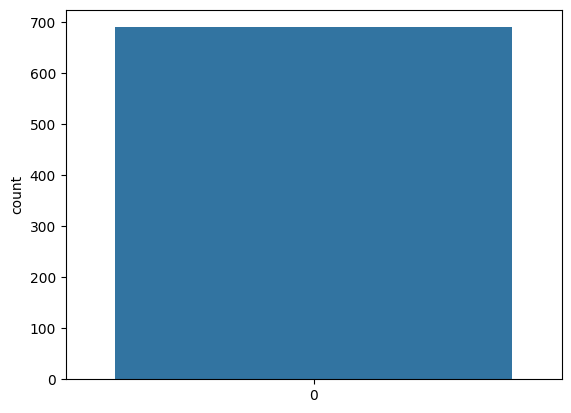

In [20]:
sns.countplot(df['Approved'])#not approved is more than approved
plt.show()

0    383
1    307
Name: Approved, dtype: int64


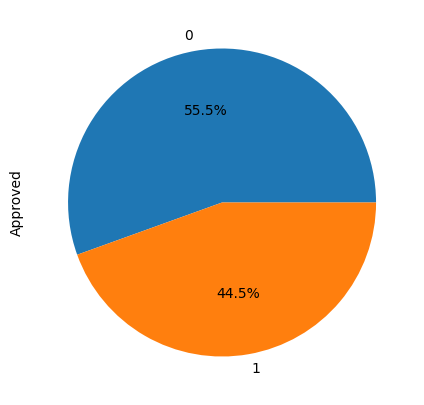

In [22]:
print(df['Approved'].value_counts())
df['Approved'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.show()

In [23]:
df.isnull().sum()# there are no null values if there are null values you can fill them by using bfill,ffill,mean,median,mode

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [24]:
df.head(2)

Gender    Age  Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.00        1             1  Industrials     White   
1       0  58.67  4.46        1             1    Materials     Black   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   

   Citizen  ZipCode  Income  Approved  
0  ByBirth      202       0         1  
1  ByBirth       43     560         1

In [25]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [26]:
df.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object

In [27]:
df.head(2)

Gender    Age  Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.00        1             1  Industrials     White   
1       0  58.67  4.46        1             1    Materials     Black   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   

   Citizen  ZipCode  Income  Approved  
0  ByBirth      202       0         1  
1  ByBirth       43     560         1

# **Display of mean,median,skewness,kurtosis,nullvalue count**

In [28]:
for col in df.columns:
    if df[col].dtypes != object:
        q1 = df[col].quantile(0.25)
        q2 = df[col].quantile(0.50)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        llp = q1-1.5*IQR
        ulp = q3+1.5*IQR
        print('column name',col)
        print('q1',q1)
        print('q2',q2)
        print('q3',q3)
        print('IQR',IQR)
        print('llp',llp)
        print('ulp',ulp)
        print('mean:',df[col].mean())
        print('median:',df[col].median())
        print('mode',df[col].mode()[0])
        print('skewness:',df[col].skew())
        print('kurtosis:',df[col].kurtosis())
        print('std',df[col].std())
        print('max',df[col].max())
        print('min',df[col].min())
        print('null_value count:',df[col].isnull().sum())
        print('\n')

column name Gender
q1 0.0
q2 1.0
q3 1.0
IQR 1.0
llp -1.5
ulp 2.5
mean: 0.6956521739130435
median: 1.0
mode 1
skewness: -0.8522739536938141
kurtosis: -1.2773399719578602
std 0.4604644536703794
max 1
min 0
null_value count: 0


column name Age
q1 22.67
q2 28.46
q3 37.707499999999996
IQR 15.037499999999994
llp 0.11375000000001023
ulp 60.26374999999999
mean: 31.514115942028983
median: 28.46
mode 28.46
skewness: 1.1673042222218972
kurtosis: 1.2035536514719607
std 11.860244756156716
max 80.25
min 13.75
null_value count: 0


column name Debt
q1 1.0
q2 2.75
q3 7.2075
IQR 6.2075
llp -8.31125
ulp 16.518749999999997
mean: 4.758724637681159
median: 2.75
mode 1.5
skewness: 1.4888131246649208
kurtosis: 2.274021886890654
std 4.978163248528541
max 28.0
min 0.0
null_value count: 0


column name Married
q1 1.0
q2 1.0
q3 1.0
IQR 0.0
llp 1.0
ulp 1.0
mean: 0.7608695652173914
median: 1.0
mode 1
skewness: -1.2258196957042626
kurtosis: -0.4988203496175454
std 0.4268619730839498
max 1
min 0
null_value count: 0

# **Data visualizations**

In [29]:
pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 9.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB
None
Shape of your Da

Number of All Scatter Plots = 6


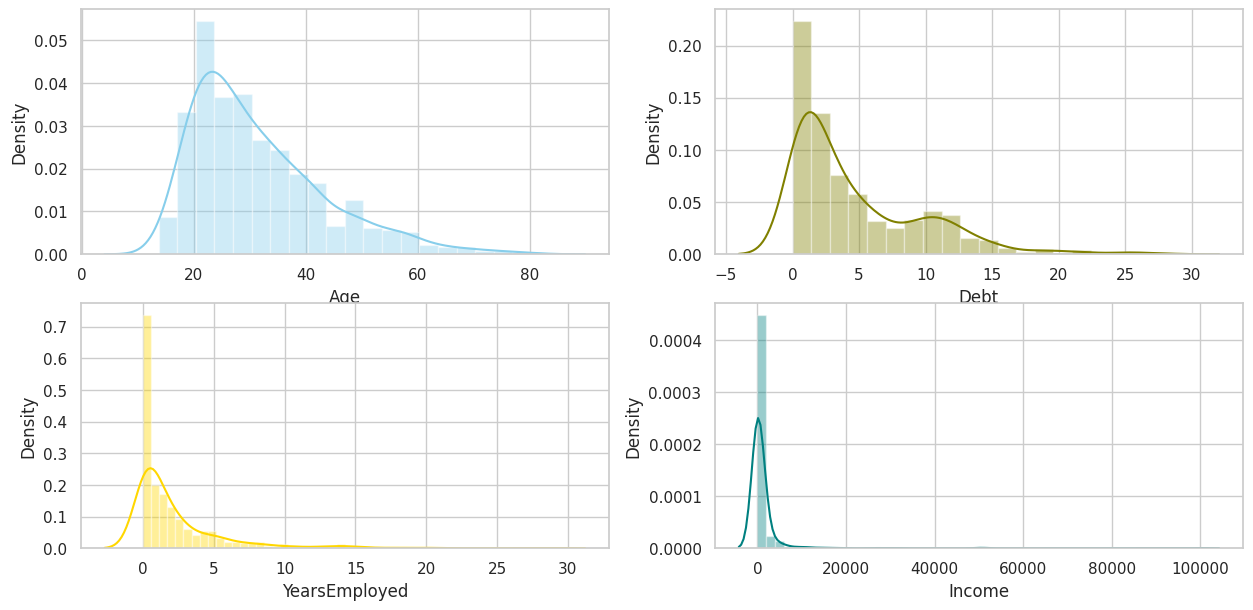

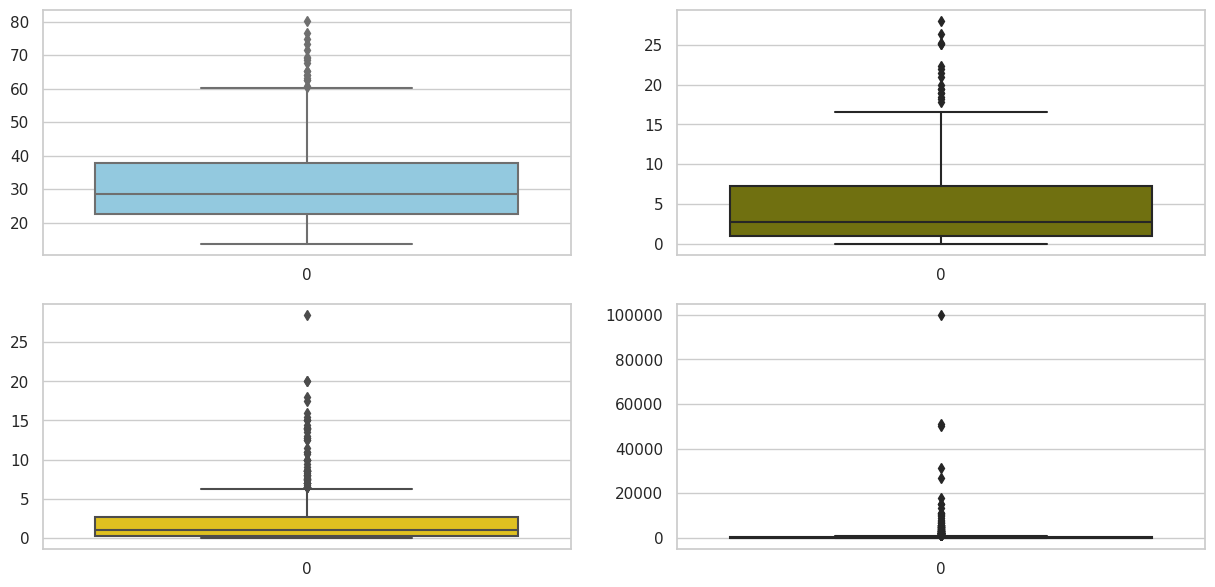

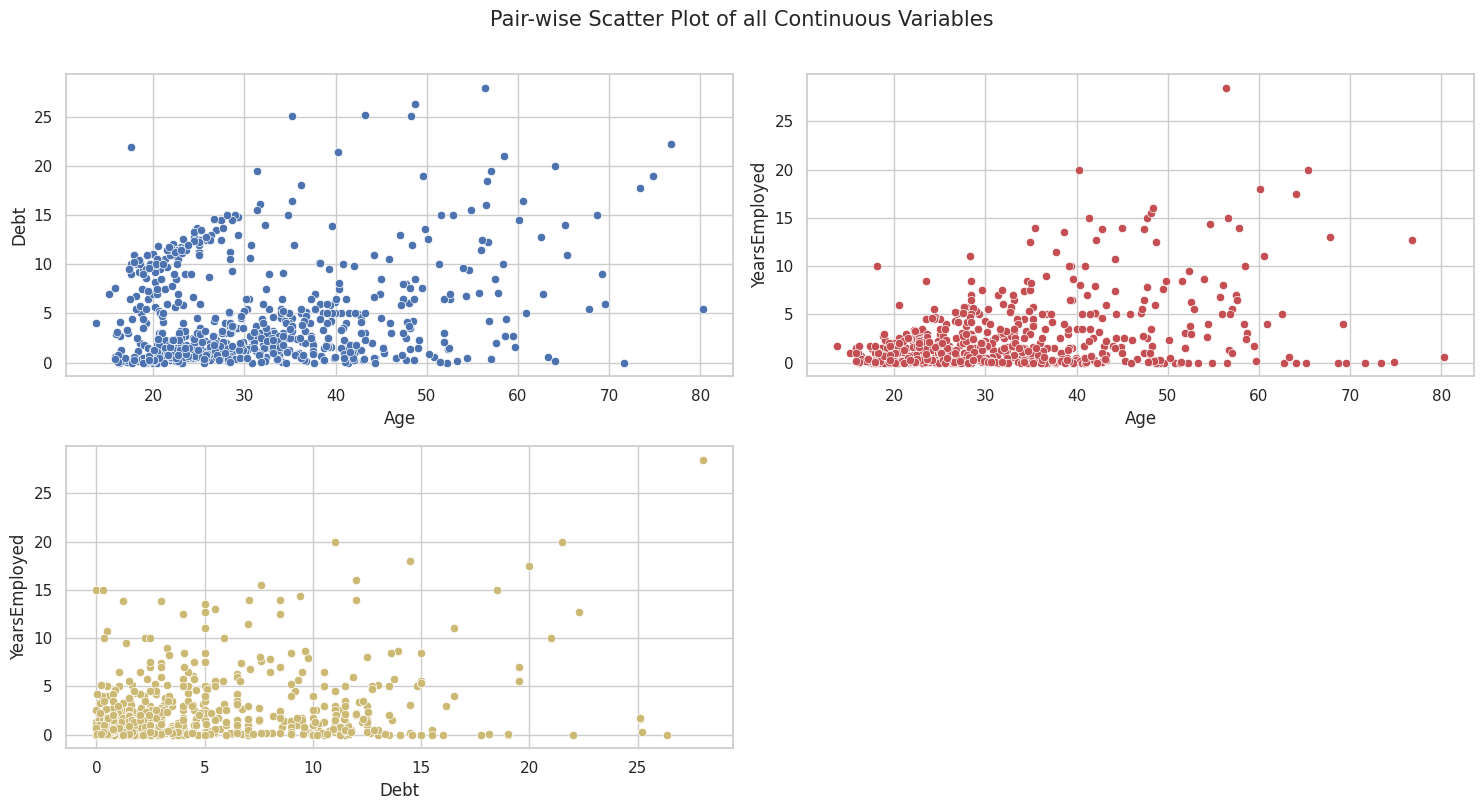

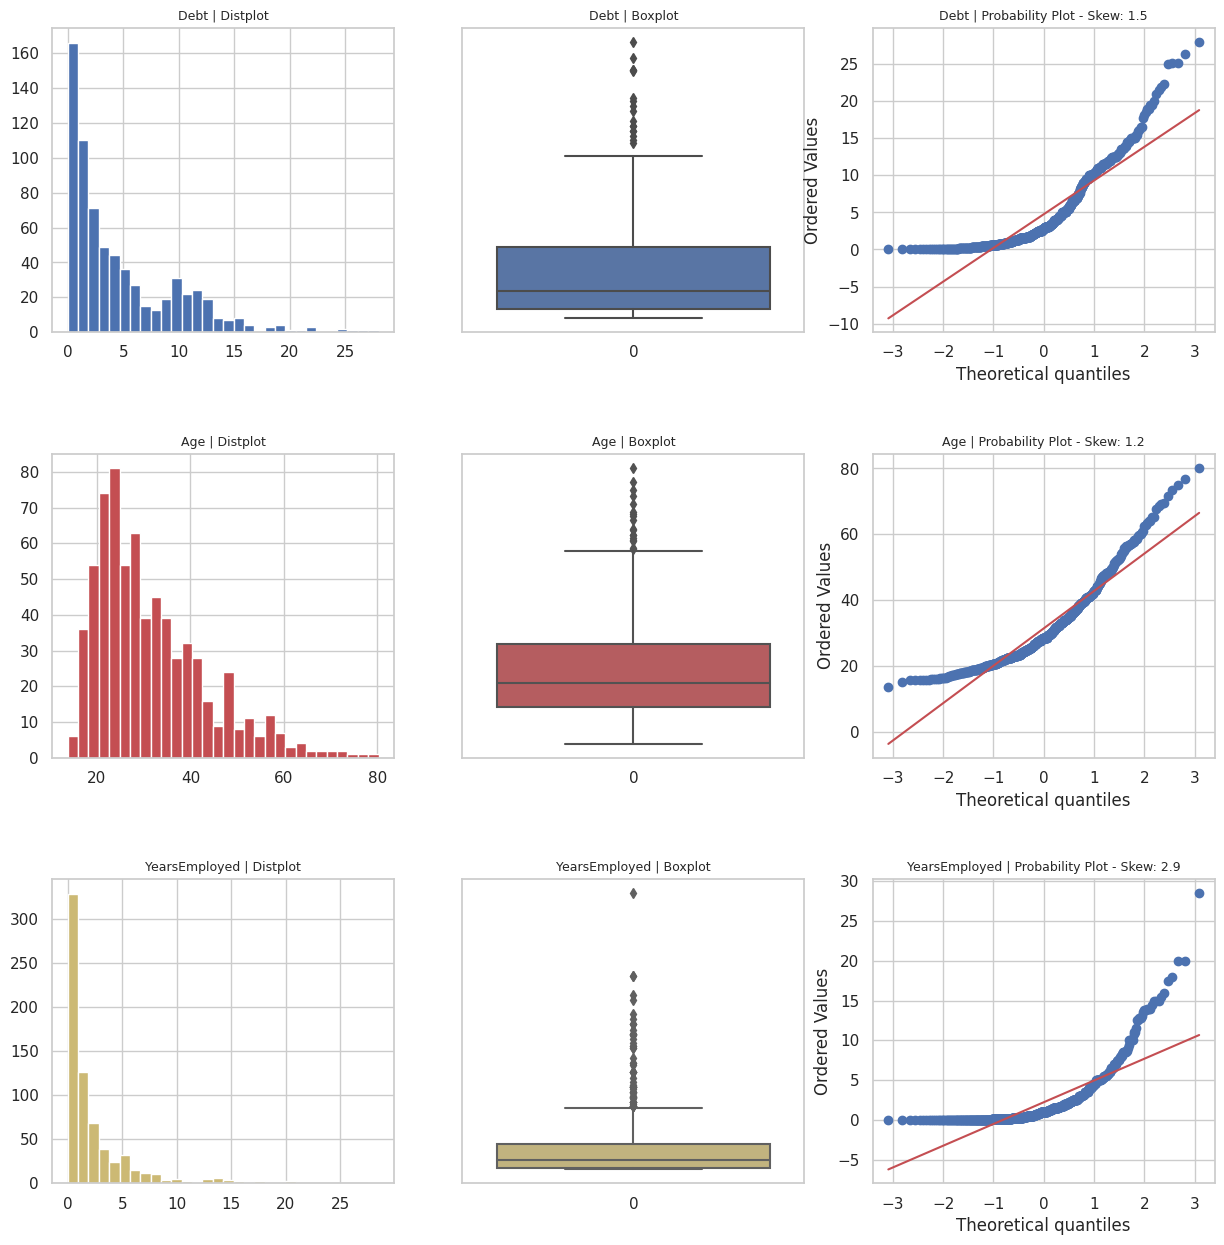

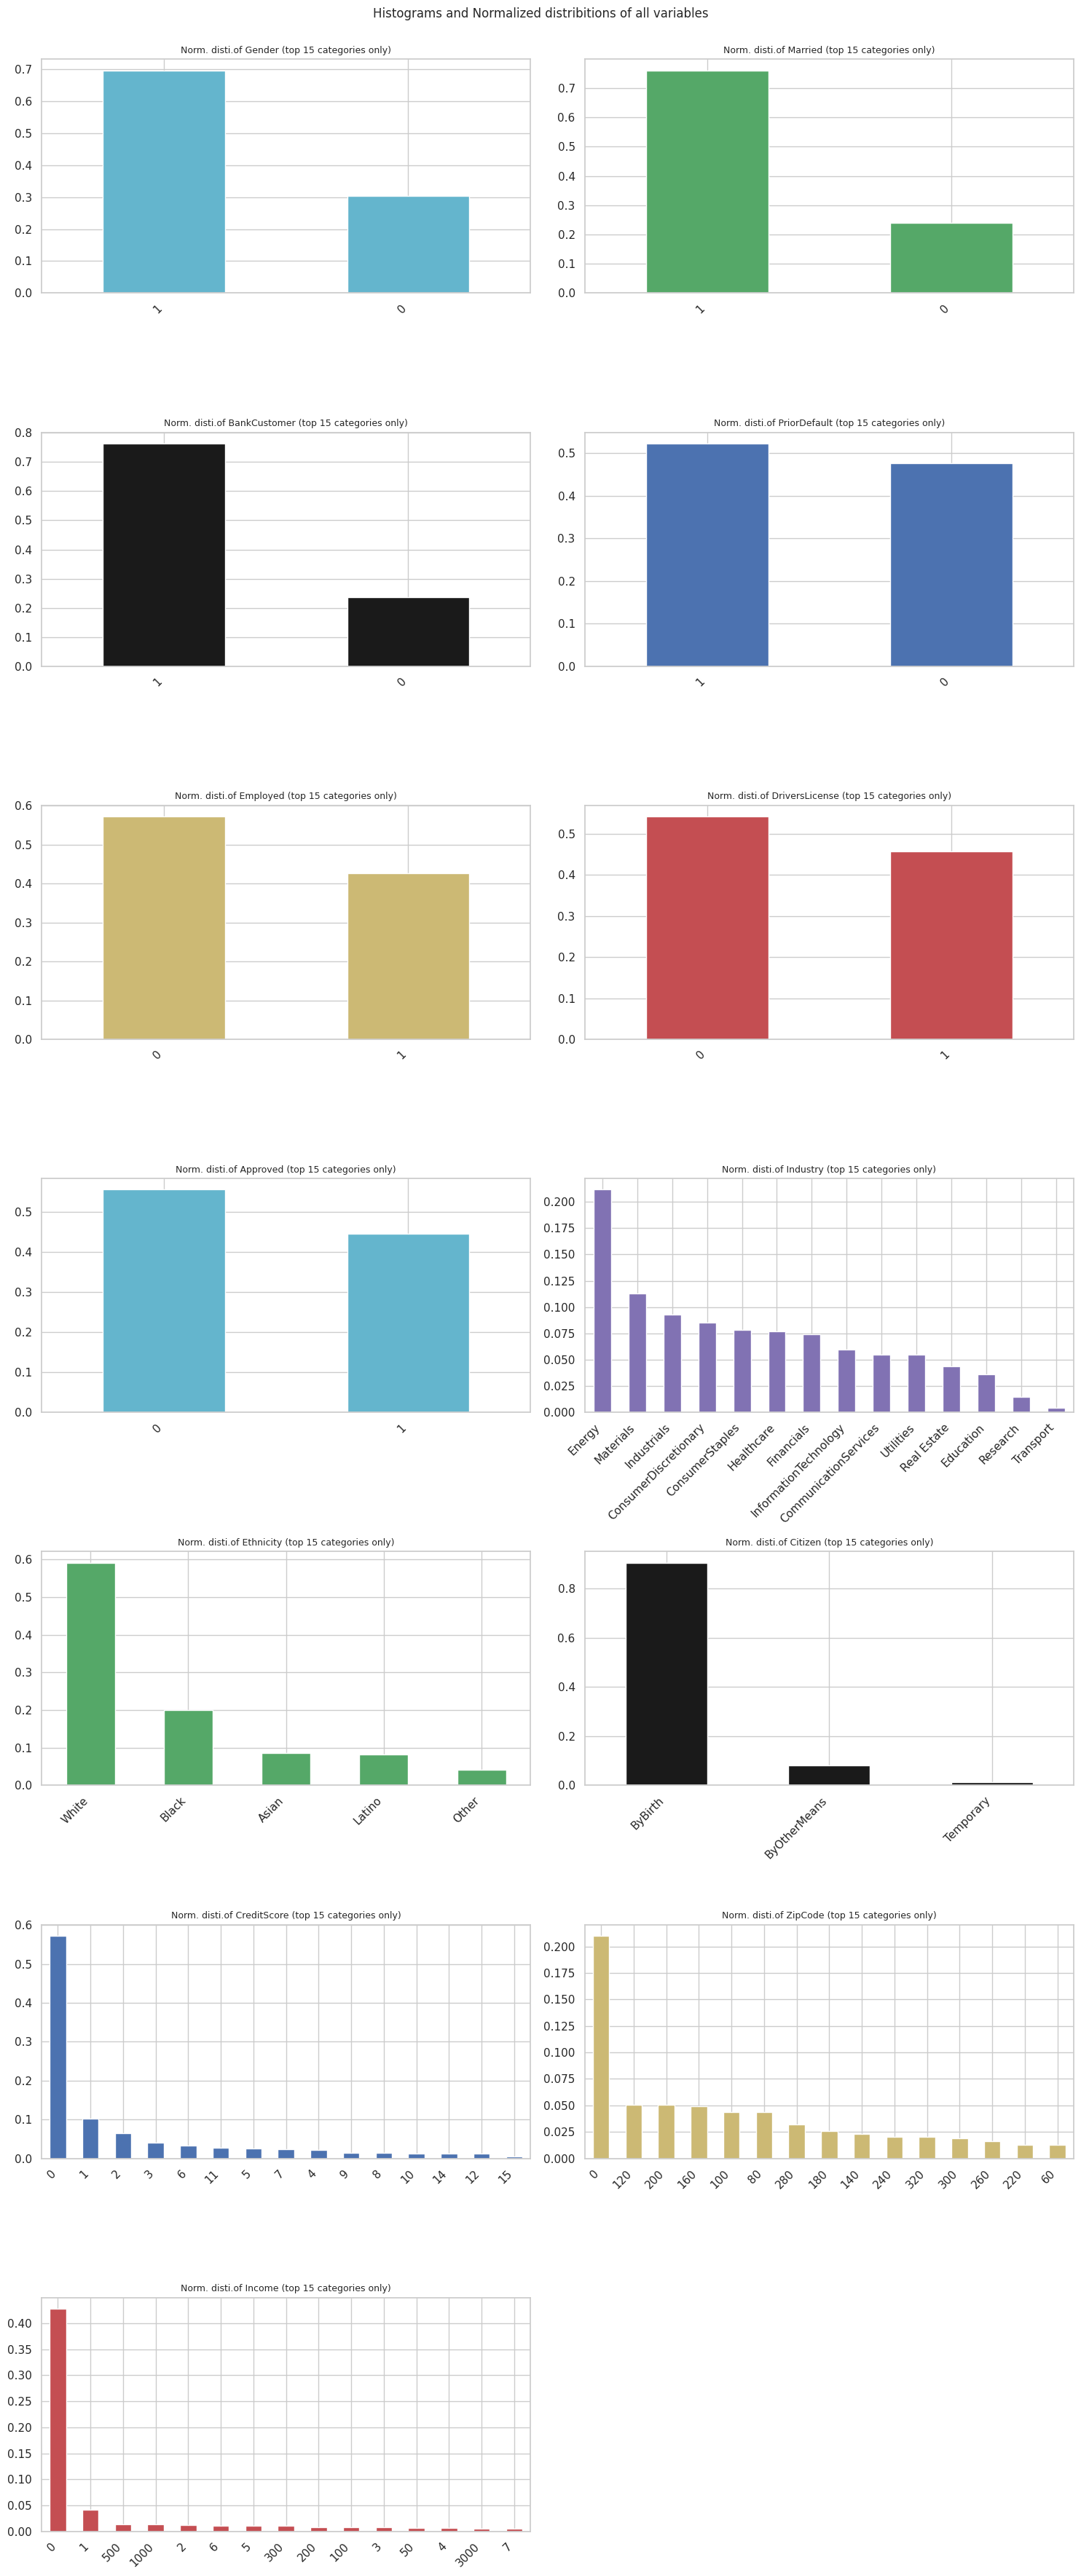

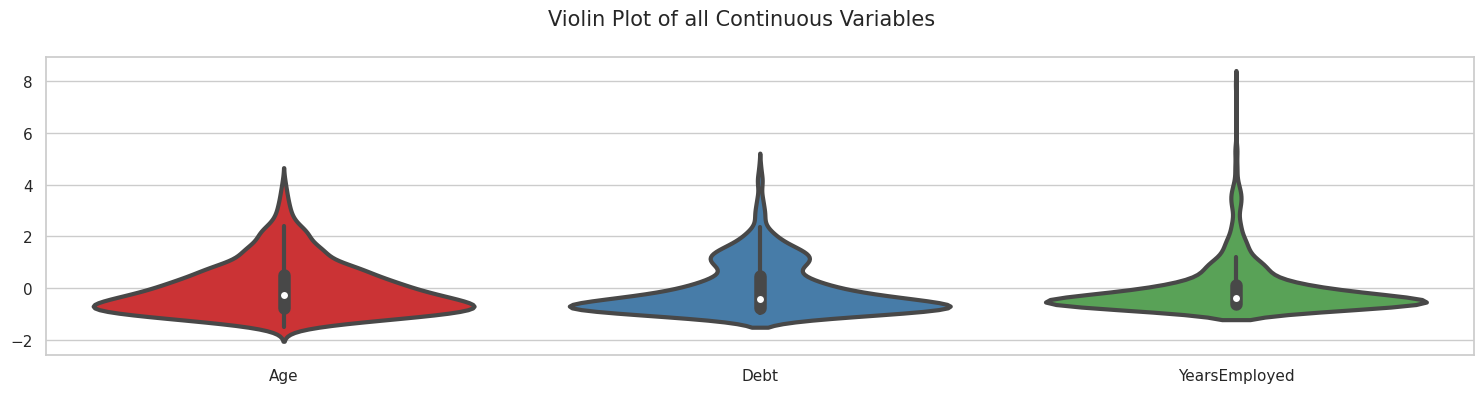

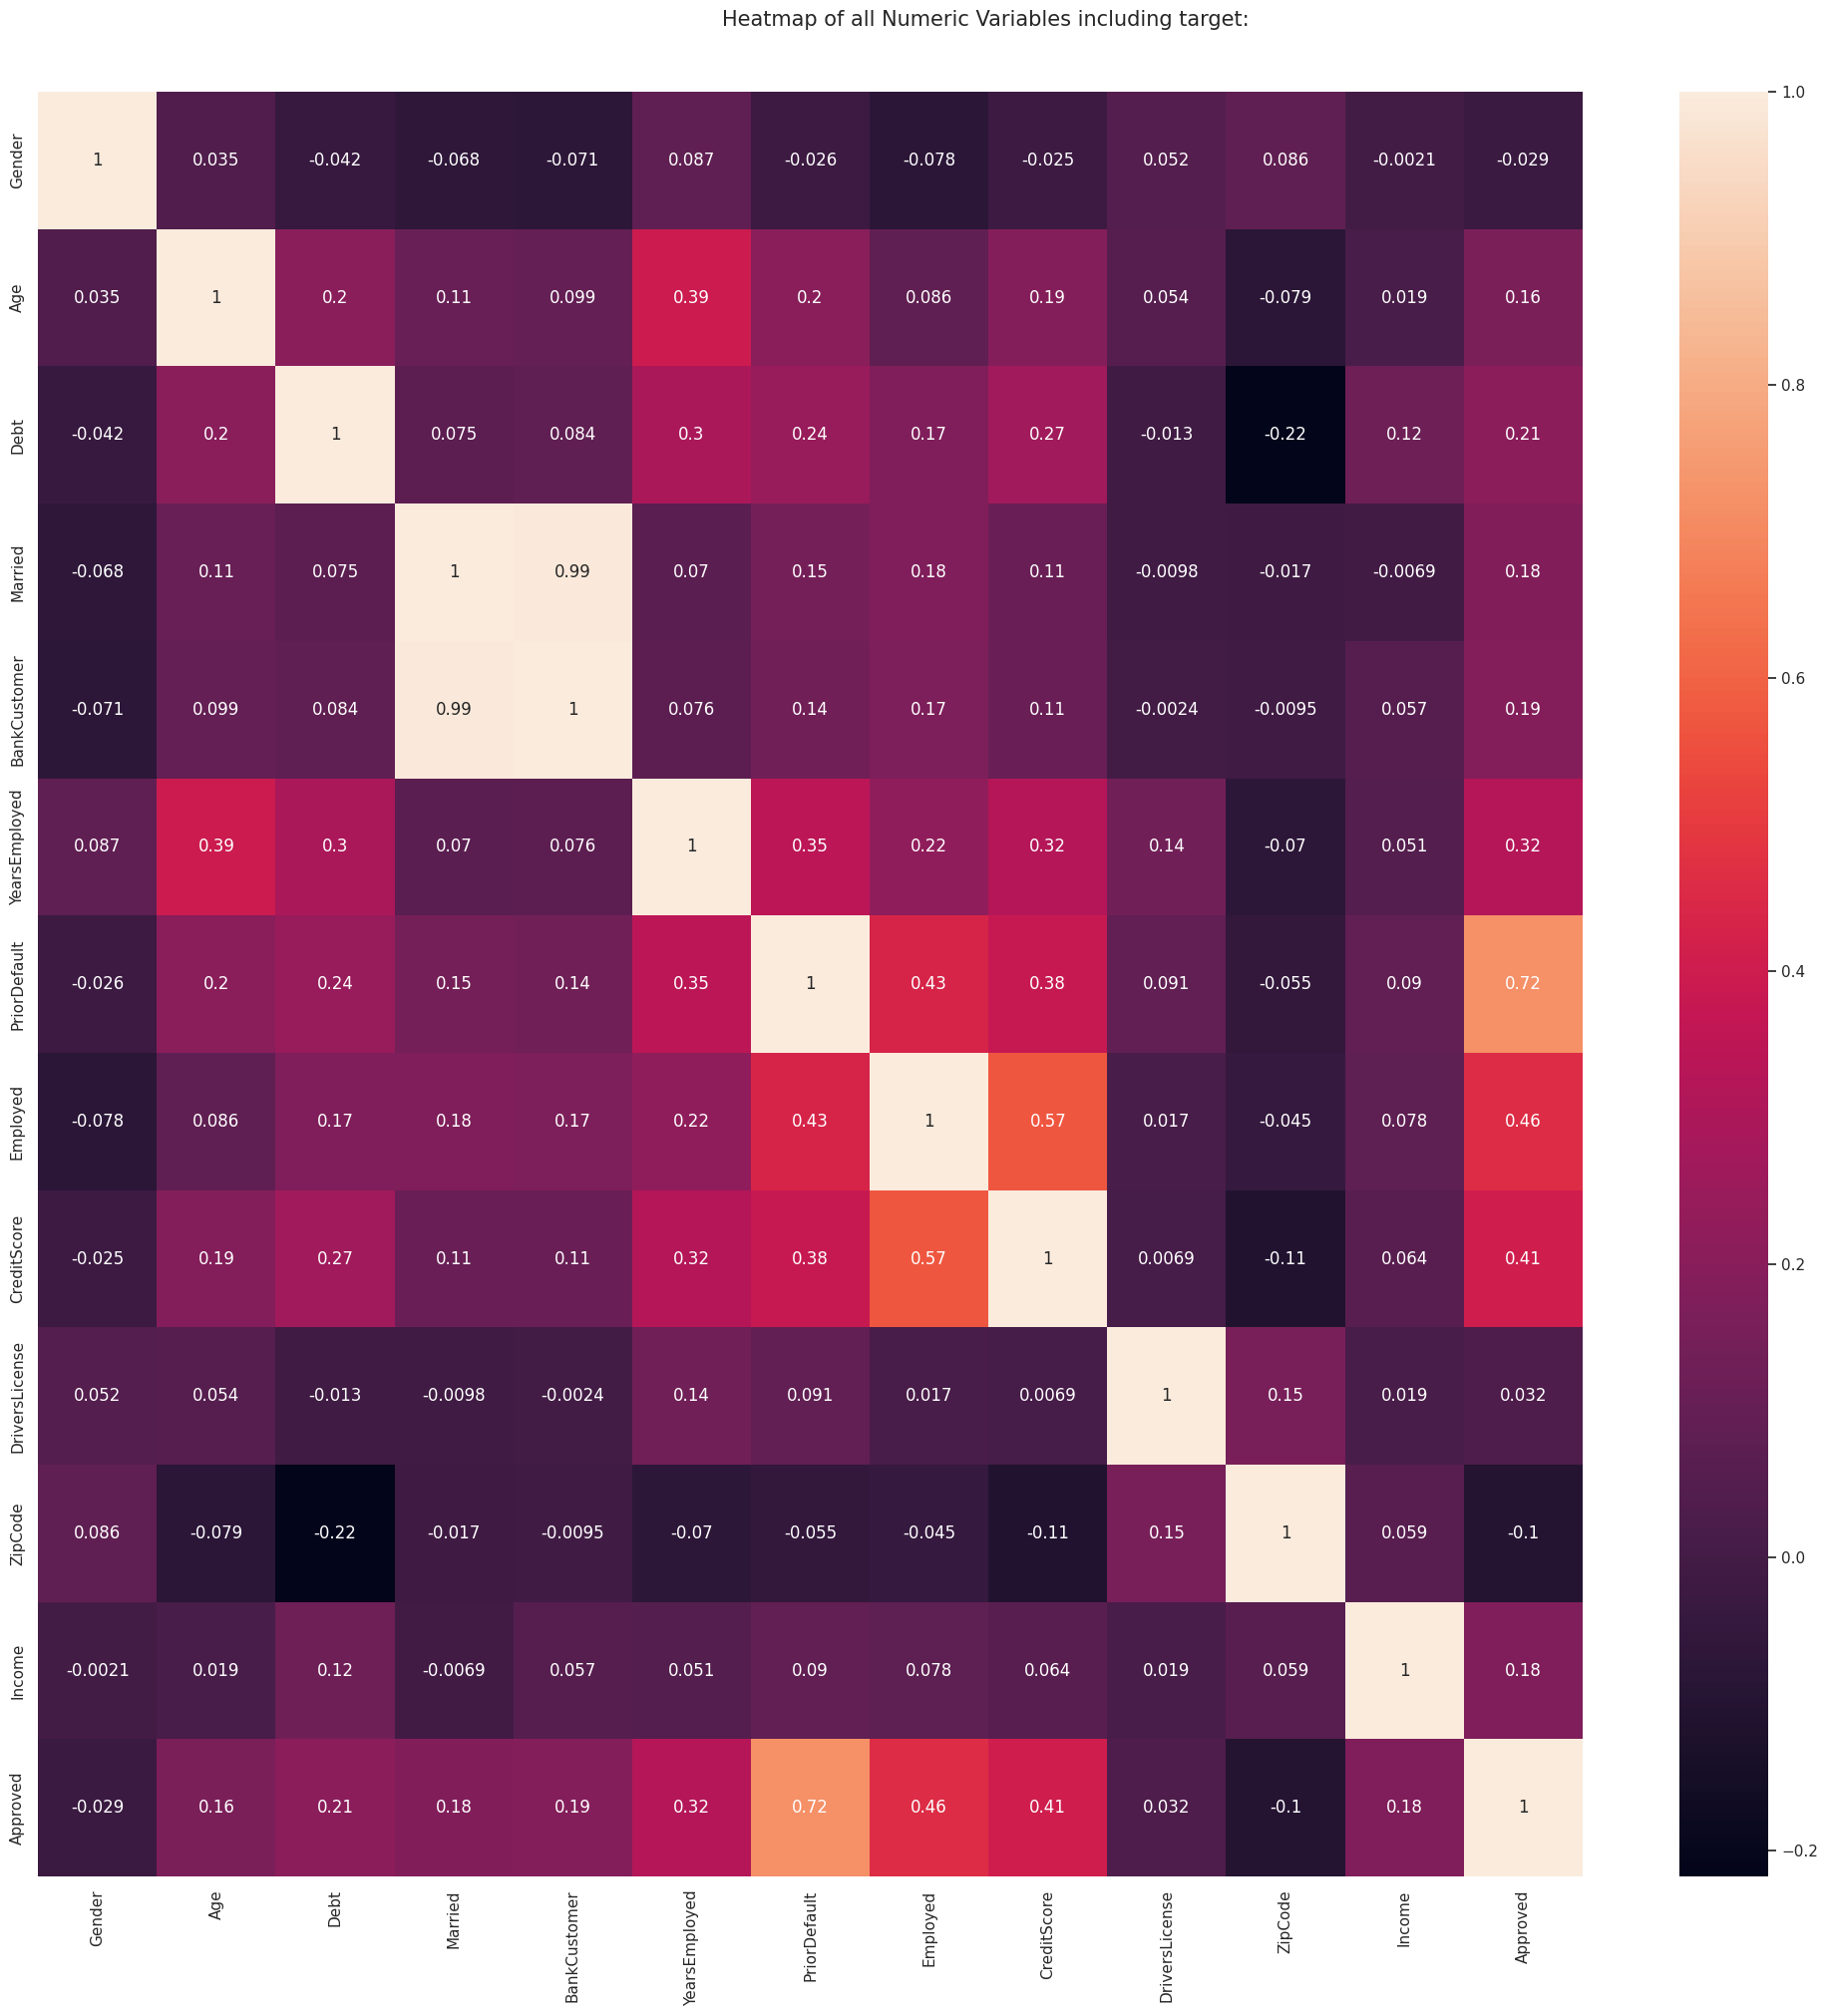

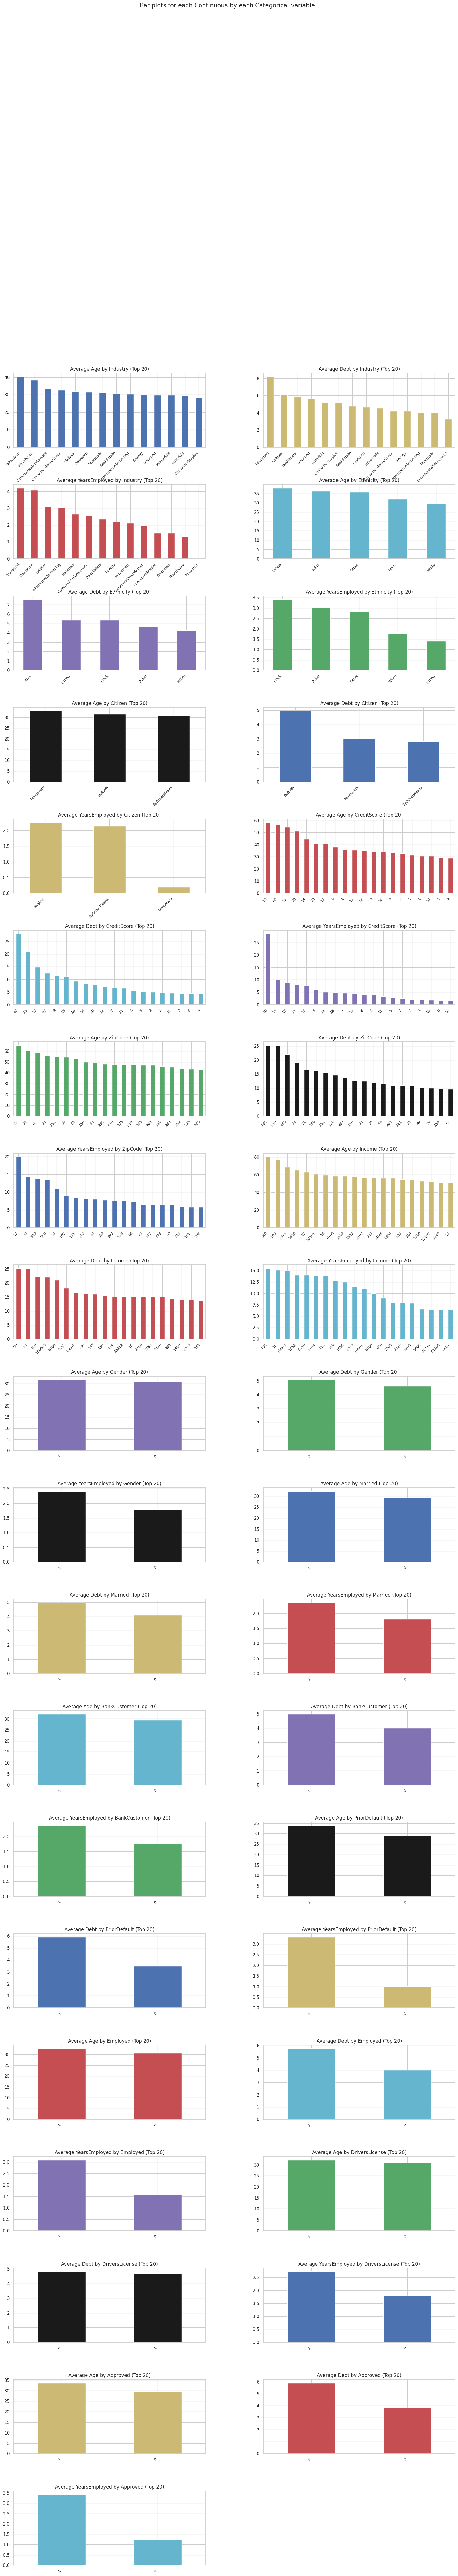

All Plots done
Time to run AutoViz = 25 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [39]:
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class

# GitHub raw URL of the dataset (replace with your dataset URL)
github_url = "https://raw.githubusercontent.com/Data-Science-Revolution/Credit-Card-Approval/main/clean_dataset.csv"

# Load the dataset using pandas
df = pd.read_csv(github_url)

# Display basic information about the dataset
df_info = df.info()
print(df_info)

# Use AutoViz for automatic visualization
AV = AutoViz_Class()
report = AV.AutoViz(
    filename="",
    dfte=df,
    depVar="",
    verbose=0,
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

# The visualizations will be displayed in the report variable



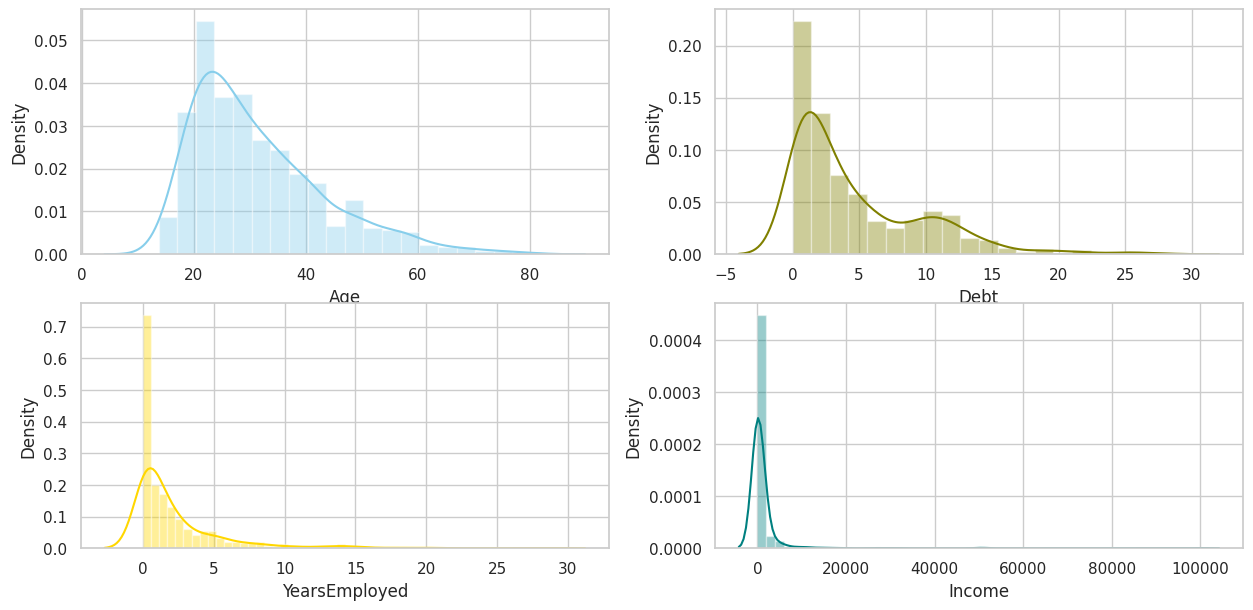

In [40]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False)
sns.distplot(df.iloc[:,1], color="skyblue", ax=axes[0,0])
sns.distplot(df.iloc[:,2], color="olive", ax=axes[0,1])
sns.distplot(df.iloc[:,7], color="gold", ax=axes[1,0])
sns.distplot(df.iloc[:,-2], color="teal", ax=axes[1,1])
plt.show()
# from above distplot we can see that the data is right skewed because the outliers are on the right side
# if there is skewness we can use median or mode to fill null values


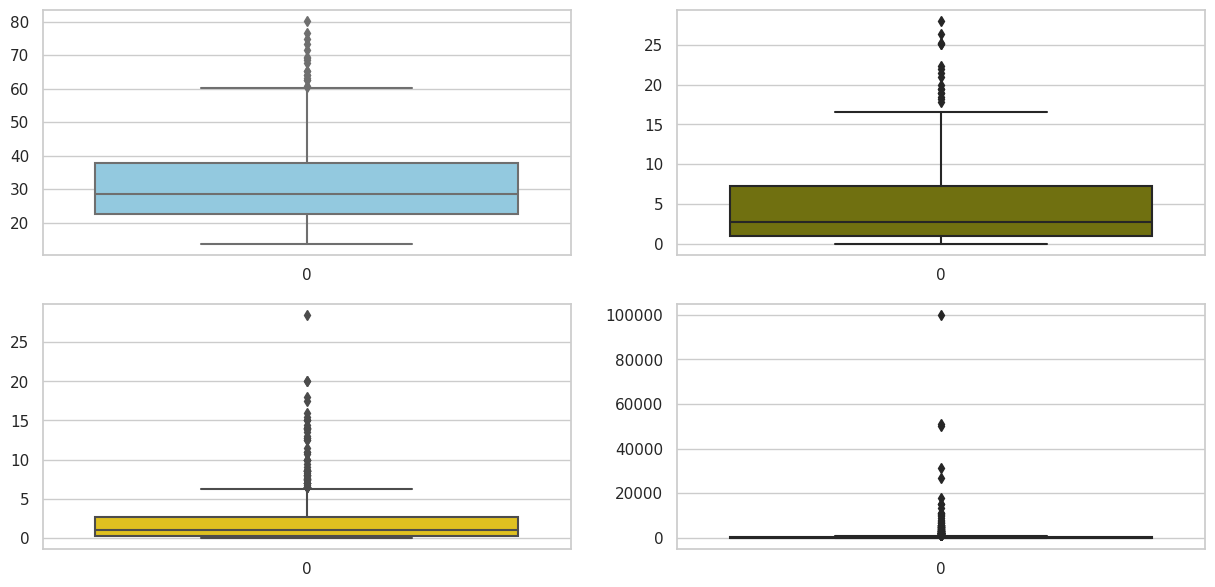

In [41]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False) # boxplot and distribution plots can be used to find outiers
sns.boxplot(df.iloc[:,1], color="skyblue", ax=axes[0,0])# from boxplot and distplot we can find wheather the data is skewed
sns.boxplot(df.iloc[:,2], color="olive", ax=axes[0,1])
sns.boxplot(df.iloc[:,7], color="gold", ax=axes[1,0])
sns.boxplot(df.iloc[:,-2], color="teal", ax=axes[1,1])
plt.show()

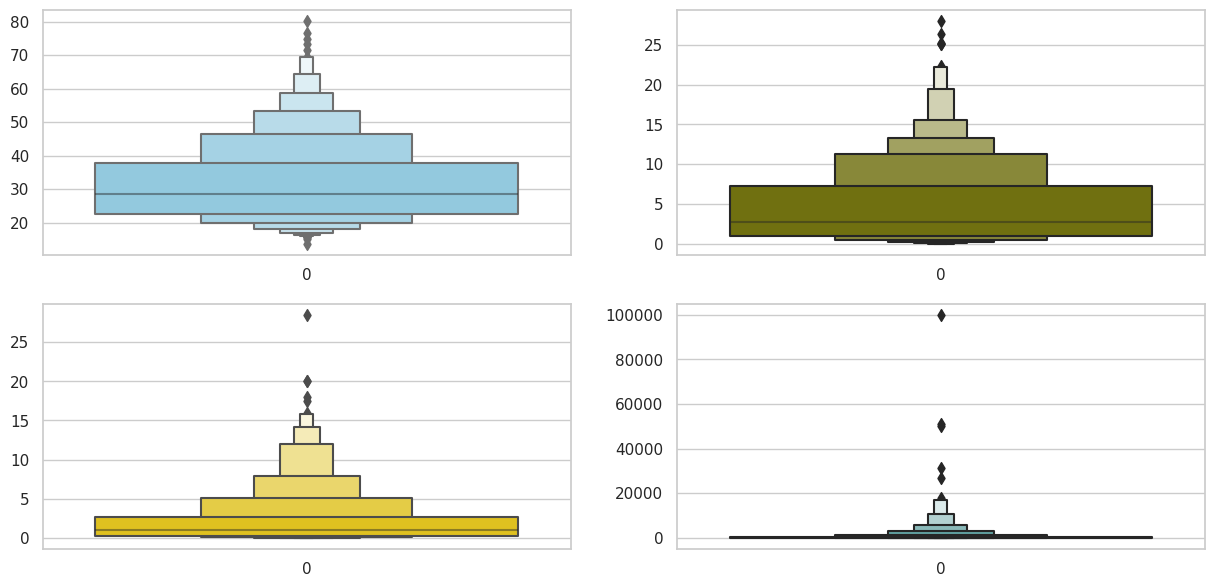

In [42]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False) # boxplot and distribution plots can be used to find outiers
sns.boxenplot(df.iloc[:,1], color="skyblue", ax=axes[0,0])# from boxplot and distplot we can find wheather the data is skewed
sns.boxenplot(df.iloc[:,2], color="olive", ax=axes[0,1])
sns.boxenplot(df.iloc[:,7], color="gold", ax=axes[1,0])
sns.boxenplot(df.iloc[:,-2], color="teal", ax=axes[1,1])
plt.show()

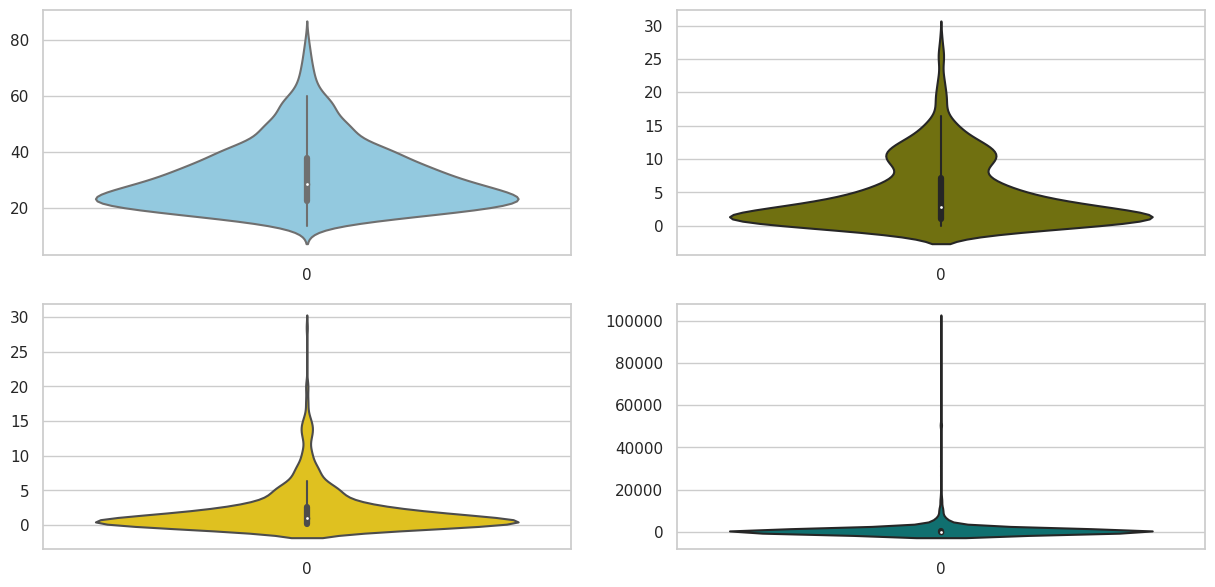

In [43]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False) # boxplot and distribution plots can be used to find outiers
sns.violinplot(df.iloc[:,1], color="skyblue", ax=axes[0,0])# from boxplot and distplot we can find wheather the data is skewed
sns.violinplot(df.iloc[:,2], color="olive", ax=axes[0,1])
sns.violinplot(df.iloc[:,7], color="gold", ax=axes[1,0])
sns.violinplot(df.iloc[:,-2], color="teal", ax=axes[1,1])
plt.show()

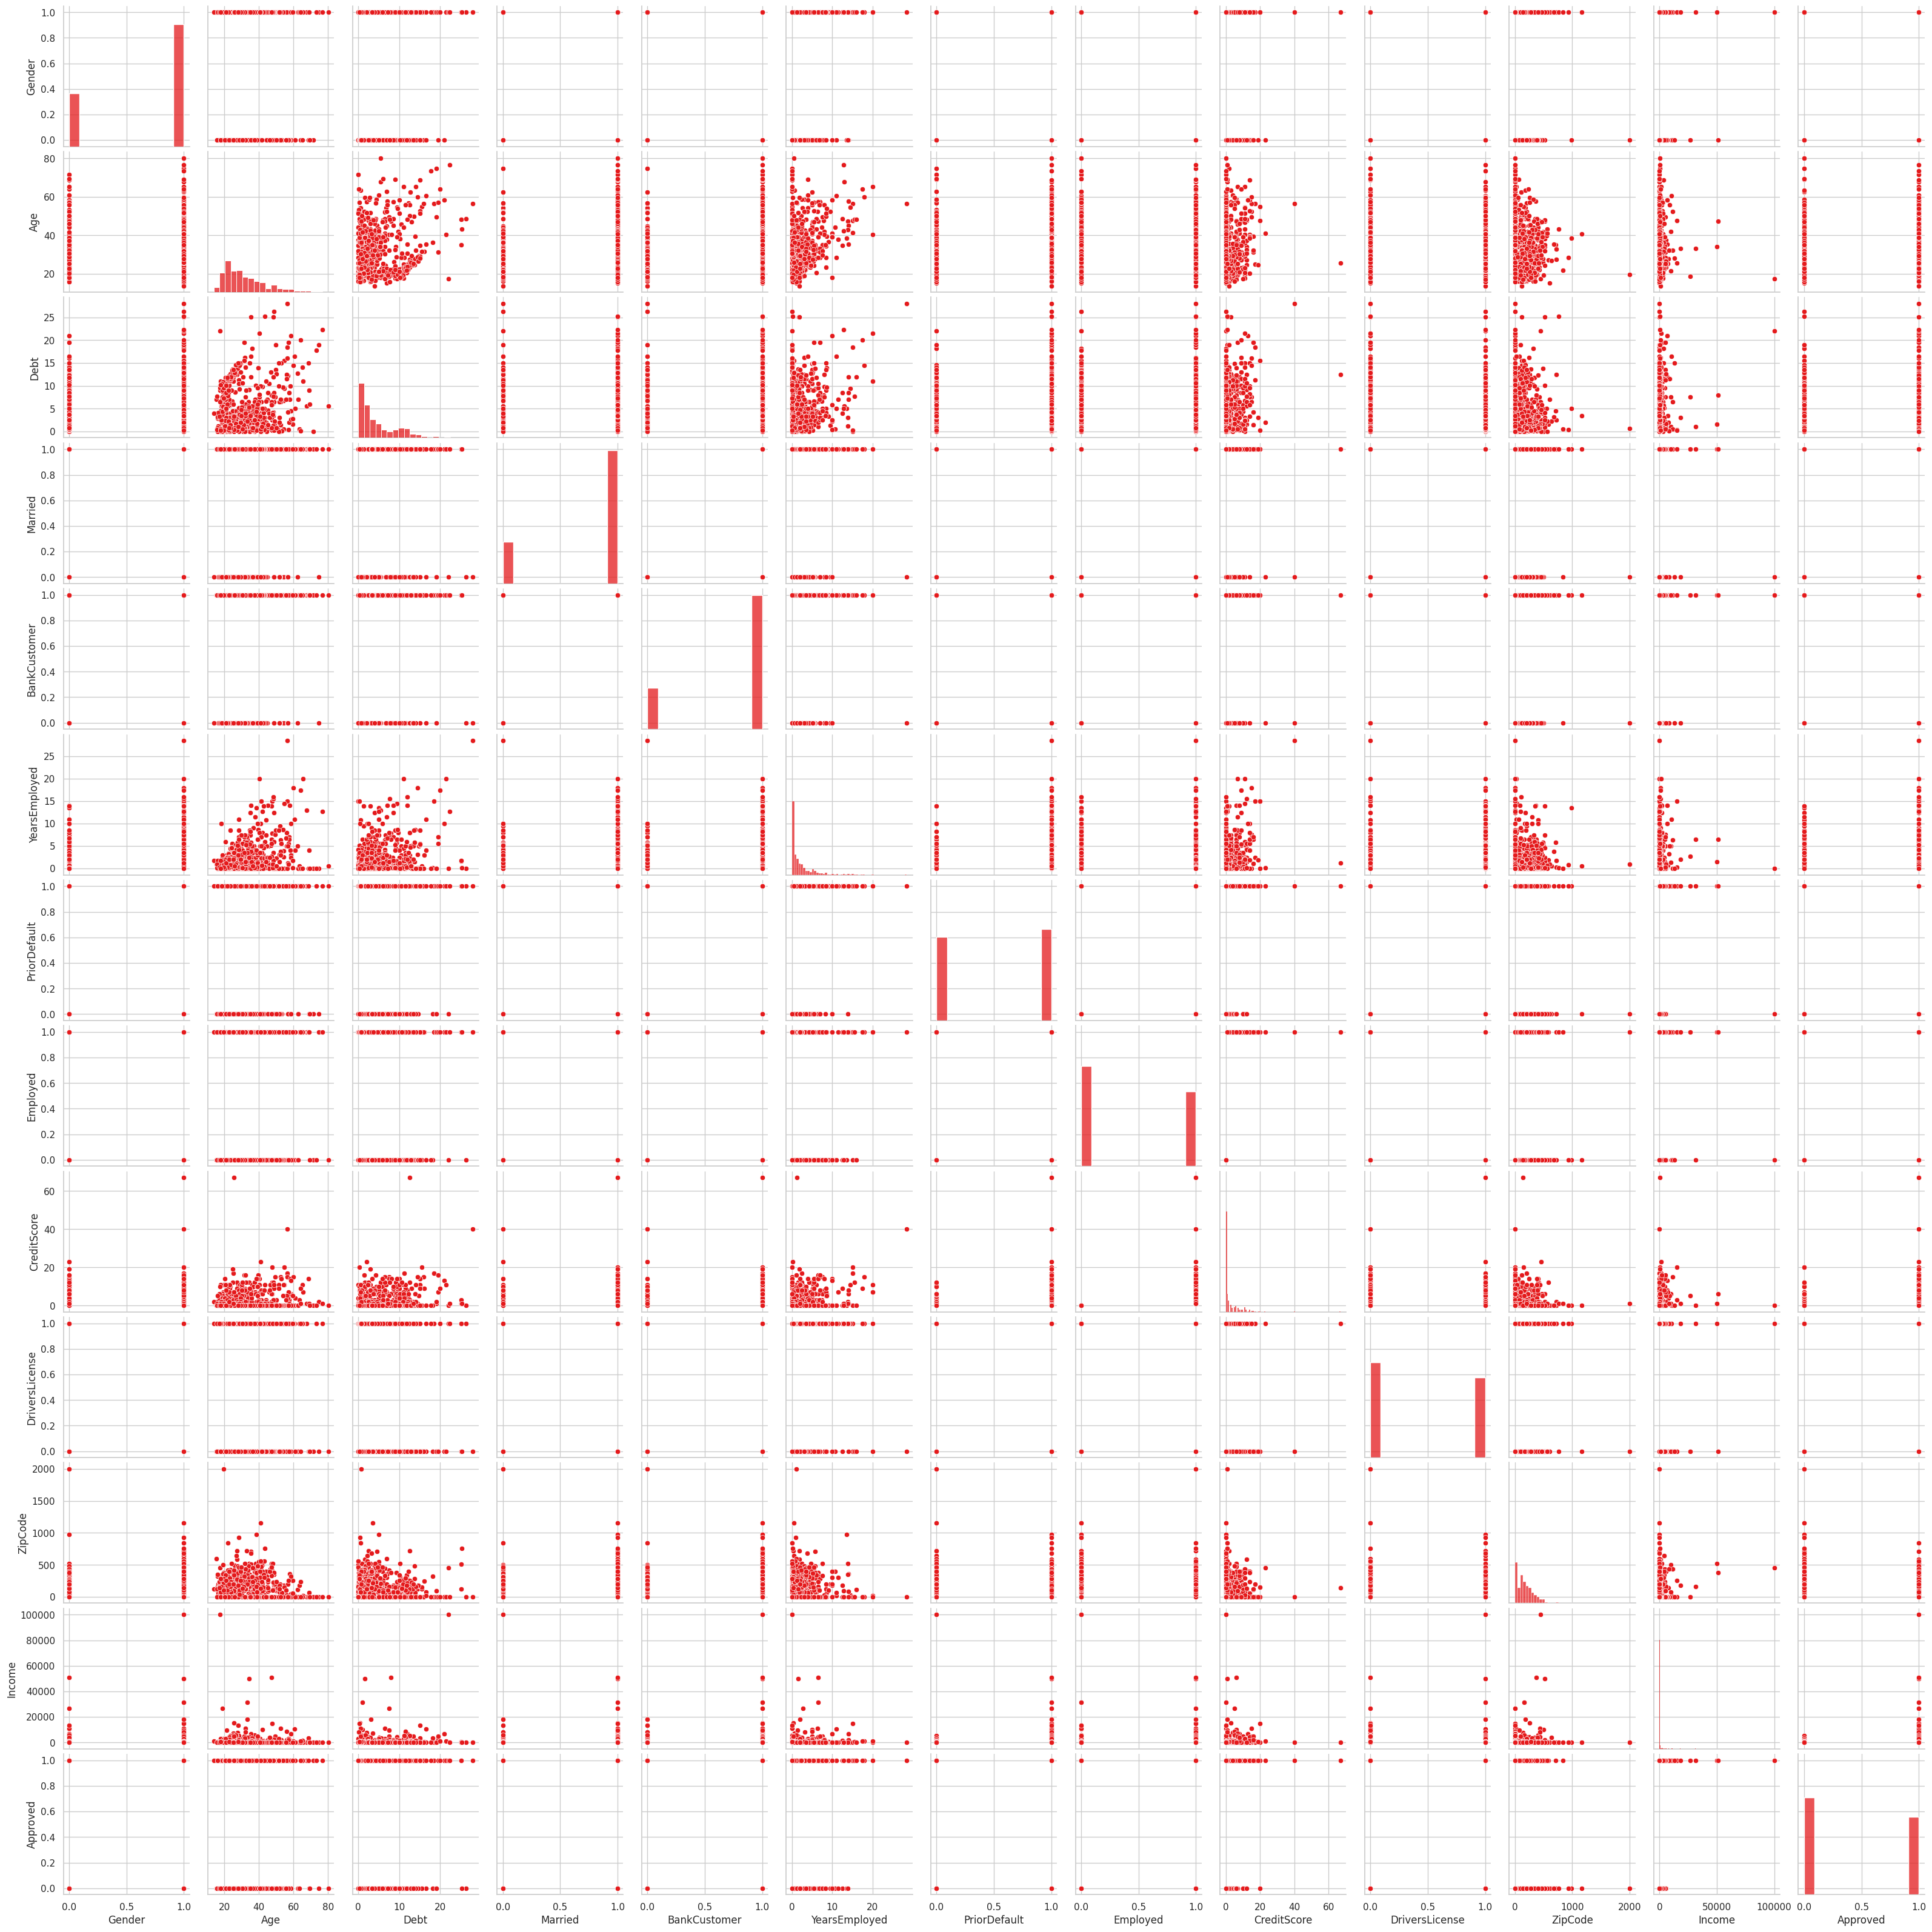

In [44]:
sns.pairplot(df)
plt.show()# from pairplot we can know the how data is distributed for each and every column

In [45]:
df.corr()

Gender      Age      Debt     Married  BankCustomer  \
Gender          1.000000  0.035044 -0.041746 -0.068062   -0.071250     
Age             0.035044  1.000000  0.202177  0.106929    0.099477     
Debt           -0.041746  0.202177  1.000000  0.074649    0.083781     
Married        -0.068062  0.106929  0.074649  1.000000    0.992033     
BankCustomer   -0.071250  0.099477  0.083781  0.992033    1.000000     
YearsEmployed   0.086544  0.391464  0.298902  0.069945    0.075905     
PriorDefault   -0.026047  0.204434  0.244317  0.145073    0.138535     
Employed       -0.077784  0.086037  0.174846  0.175428    0.170268     
CreditScore    -0.024630  0.187327  0.271207  0.113968    0.111077     
DriversLicense  0.051674  0.053599 -0.013023 -0.009784   -0.002402     
ZipCode         0.086007 -0.078690 -0.217903 -0.017074   -0.009513     
Income         -0.002063  0.018719  0.123121 -0.006899    0.057273     
Approved       -0.028934  0.164086  0.206294  0.180583    0.188964     

                YearsEmployed  PriorDefault  Employed  CreditScore  \
Gender            0.086544      -0.026047   -0.077784  -0.024630     
Age               0.391464       0.204434    0.086037   0.187327     
Debt              0.298902       0.244317    0.174846   0.271207     
Married           0.069945       0.145073    0.175428   0.113968     
BankCustomer      0.075905       0.138535    0.170268   0.111077     
YearsEmployed     1.000000       0.345689    0.222982   0.322330     
PriorDefault      0.345689       1.000000    0.432032   0.379532     
Employed          0.222982       0.432032    1.000000   0.571498     
CreditScore       0.322330       0.379532    0.571498   1.000000     
DriversLicense    0.138139       0.091276    0.017043   0.006944     
ZipCode          -0.070495      -0.055010   -0.044834  -0.112816     
Income            0.051345       0.090012    0.077652   0.063692     
Approved          0.322475       0.720407    0.458301   0.406410     

                DriversLicense   ZipCode   Income   Approved  
Gender             0.051674     0.086007 -0.002063 -0.028934  
Age                0.053599    -0.078690  0.018719  0.164086  
Debt              -0.013023    -0.217903  0.123121  0.206294  
Married           -0.009784    -0.017074 -0.006899  0.180583  
BankCustomer      -0.002402    -0.009513  0.057273  0.188964  
YearsEmployed      0.138139    -0.070495  0.051345  0.322475  
PriorDefault       0.091276    -0.055010  0.090012  0.720407  
Employed           0.017043    -0.044834  0.077652  0.458301  
CreditScore        0.006944    -0.112816  0.063692  0.406410  
DriversLicense     1.000000     0.154924  0.019201  0.031625  
ZipCode            0.154924     1.000000  0.059234 -0.099598  
Income             0.019201     0.059234  1.000000  0.175657  
Approved           0.031625    -0.099598  0.175657  1.000000

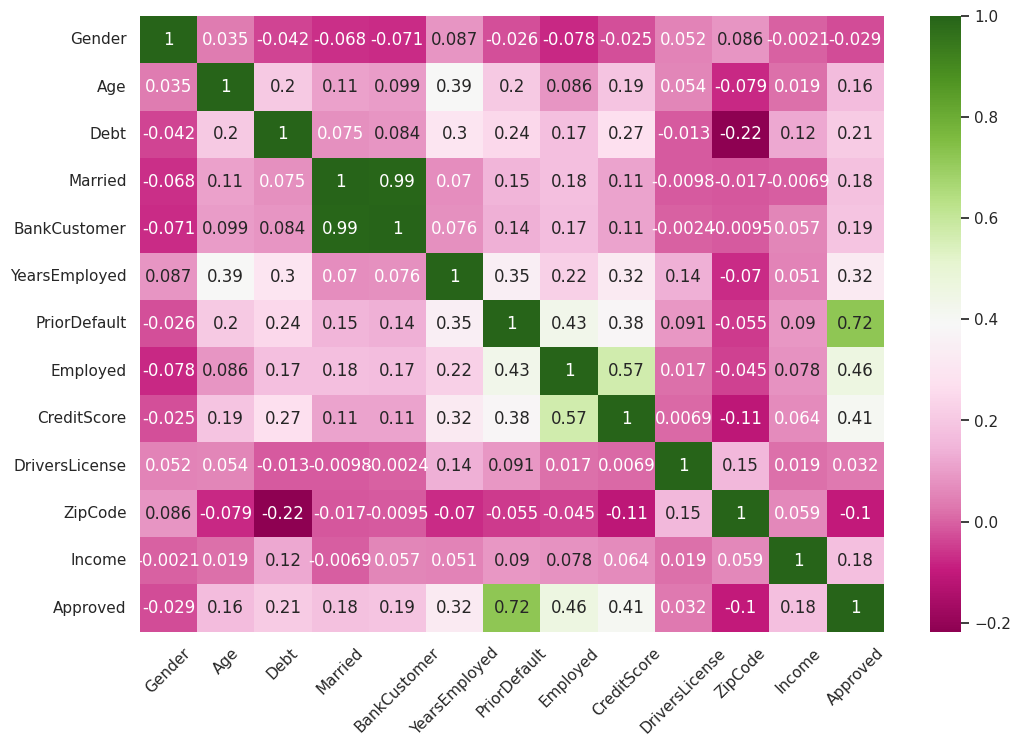

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True,cmap="PiYG")
plt.xticks(rotation=45);

From correlation the approved and prior default columns are highly correlated because as priordefault increases the approval decreases